# Exploratory data analysis (EDA): feature engineering and feature selection

**Author:** Y.X. Wu


In [1]:
from utils.FeatureCalculator import FeatureCalculator
import numpy as np
import pandas as pd
import os

# display the current working directory
display("Current working directory: {0}".format(os.getcwd()))

data_path = '../Dataset_Cleaned/'
display(os.path.isfile(data_path+'LiteratureDataset_Corrosion_YW_v3.xlsx'))

'Current working directory: /nethome/home3/yuxiang.wu/CCA-representation-ML/Dataset_EDA_Pairplot_Feature_PCA_Mahalanobis'

True

## Feature engineering

### Feature Calculation for Alloy Components

Prepares and processes data about alloy compositions, specifically it creates a `FeatureCalculator` object from the defined compositions, then calculates and prints the corresponding alloy features.

Zhou, et al., npj Computational Materials (2019)5:128 ; https://doi.org/10.1038/s41524-019-0265-1

| Engineered feature parameters                         | Formula                                                                                          |
| ----------------------------------------------------- | ------------------------------------------------------------------------------------------------ |
| Mean atom radius                                      | $a=\sum_{i=1}^n c_i r_i$                                                                         |
| Atomic size difference                                | $\delta=\sqrt{\sum_{i=1}^n c_i\left(1-\frac{r_i}{a}\right)^2}$                                   |
| Average of the melting points of constituent elements | $T_m=\sum_{i=1}^n c_i T_{m i}$                                                                   |
| Standard deviation of melting temperature             | $\sigma_T=\sqrt{\sum_{i=1}^n c_i\left(1-\frac{T_i}{T_m}\right)^2}$                               |
| Average mixing enthalpy                               | $\Delta H_{\text {mix }}=4 \sum_{i \neq j} c_i c_j H_{i j}$                                      |
| Standard deviation of mixing enthalpy                 | $\sigma_{\Delta H}=\sqrt{\sum_{i \neq j} c_i c_j\left(H_{i j}-\Delta H_{\text {mix }}\right)^2}$ |
| Ideal mixing entropy                                  | $S_{i d}=-k_B \sum_{i=1}^n c_i \ln c_i$                                                          |
| Electronegativity                                     | $X=\sum_{i=1}^n c_i X_i$                                                                         |
| Standard deviation of electronegativity               | $\Delta x=\sqrt{\sum_{i=1}^n c_i\left(X_i-X\right)^2}$                                           |
| Average VEC                                           | $V E C=\sum_{i=1}^n c_i V E C_i$                                                                 |
| Standard deviation of VEC                             | $\sigma_{V E C}=\sqrt{\sum_{i=1}^n c_i\left(V E C_i-V E C\right)^2}$                             |
| Mean bulk modulus                                     | $K=\sum_{i=1}^n c_i K_i$                                                                         |
| Standard deviation of bulk modulus                    | $\sigma_K=\sqrt{\sum_{i=1}^n c_i\left(K_i-K\right)^2}$                                           |


simple examples to use the `FeatureCalculator` object


In [2]:
# Define a list of component elements and their corresponding fractions
compo_elem = ['Ni', 'Cr', 'Mo', 'Ti', 'Fe']
ele_wt_frac = np.array([45.4530, 35.2102, 4.1389, 0.8808, 14.3170])

# Create a dictionary mapping each element to its corresponding fraction,
ele_wt_frac_dict = {elem: frac for elem, frac in zip(compo_elem, ele_wt_frac)}

# Prepare data in the format required for FeatureCalculator - a list of tuples,
# where each tuple contains a list of elements and their corresponding fractions
compositions = [(list(ele_wt_frac_dict.keys()), list(ele_wt_frac_dict.values()))]

print(compositions)

# Create a FeatureCalculator object with the prepared compositions
calculator = FeatureCalculator(compositions)

# Calculate the features using the FeatureCalculator object
features = calculator.calculate_features()


feature_names = ['a', 'delta_a', 'Tm', 'sigma_Tm', 'Hmix', 'sigma_Hmix', 'ideal_S',
                 'elec_nega', 'sigma_elec_nega', 'VEC', 'sigma_VEC', 'bulk_modulus', 'sigma_bulk_modulus']
# tabulate the features the feature under feature_names
df = pd.DataFrame(features, columns=feature_names)
display(df)

[(['Ni', 'Cr', 'Mo', 'Ti', 'Fe'], [45.453, 35.2102, 4.1389, 0.8808, 14.317])]


,a,delta_a,Tm,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
0,1.251522,0.022536,1943.689663,257.661843,-6.600685,2.725212,1.147143,1.804983,0.129477,8.019565,1.882783,1.713883e+11,14.32837


### Data Loading, Feature Calculation, and Extraction

Reads various datasets from Excel files, calculates specific features for each material composition in these datasets using a custom `FeatureCalculator` class, extracts relevant data from the corrosion and hardness datasets, and displays the first rows of the extracted data.


In [3]:
import pandas as pd
from utils.FeatureCalculator import FeatureCalculator

# Initialization of the constants and the data to be loaded
feature_names = ["a", "delta_a", "Tm", "sigma_Tm", "Hmix", "sigma_Hmix", "ideal_S",
                 "elec_nega", "sigma_elec_nega", "VEC", "sigma_VEC", "bulk_modulus", "sigma_bulk_modulus"]

# Lists of filenames, elements for each file, and the header rows for the data in each file
data_file_names = ["LiteratureDataset_Corrosion_YW_v3.xlsx",
                   "LiteratureDataset_Hardness_YW_v3.xlsx",
                   "MultiTaskModel_NiCrCoVFe_KW99_wt_pct.xlsx",
                   "MultiTaskModel_NiCrMoTiFe_KW131_wt_pct.xlsx"]
element_columns = [['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                    'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y'],
                   ['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                    'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'],
                   ['Ni', 'Cr', 'Co', 'V', 'Fe'],
                   ['Ni', 'Cr', 'Mo', 'Ti', 'Fe']]

df_header_list = [2, 2, 0, 0, 0, 0, 0, 0]
df_compo = pd.DataFrame(columns=['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                                 'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'])
features_dfs = []

# Processing each data file along with the corresponding elements
for i in range(len(data_file_names)):
    # Load and preprocess data from each excel file
    data_df = pd.read_excel(
        data_path + data_file_names[i], header=df_header_list[i])
    # print(data_df.columns)
    element_fractions = data_df[element_columns[i]].fillna(0)

    # Calculate features for each composition
    compositions = [(element_columns[i], element_fraction)
                    for element_fraction in element_fractions.values]
    feature_calculator = FeatureCalculator(compositions)
    calculated_features = feature_calculator.calculate_features()

    # Store the calculated features in a DataFrame
    features_df = pd.DataFrame(calculated_features, columns=feature_names)
    features_dfs.append(features_df)

    # Extract and store specific data and features for the corrosion and hardness datasets
    if i == 0:  # Corrosion dataset
        df_C_compo, df_C_specific_testing, df_C_specific_features, df_C_output = element_fractions, data_df[[
            'TestTemperature_C', 'ChlorideIonConcentration', 'pH', 'ScanRate_mVs']], features_df, data_df[['AvgPittingPotential_mV']]

        # now I want to make df_C_compo have the same columns as df_compo
        df_C_compo = pd.concat([df_C_compo, df_compo],
                               axis=0, ignore_index=True).fillna(0)
        # display(df_C_compo.head(1))

    if i == 1:  # Hardness dataset
        df_H_compo, df_H_specific_features, df_H_output = element_fractions, features_df, data_df[[
            'converted HV']]
        df_H_compo = pd.concat([df_H_compo, df_compo],
                               axis=0, ignore_index=True).fillna(0)
        # display(df_H_compo.head(1))

    if i == 2:  # NiCrCoVFe_KW99 dataset
        df_NiCrCoVFe_KW99_compo, df_NiCrCoVFe_KW99_specific_features = element_fractions, features_df 
    
    if i == 3:  # NiCrMoTiFe_KW131 dataset
        df_NiCrMoTiFe_KW131_compo, df_NiCrMoTiFe_KW131_specific_features = element_fractions, features_df

# Display the first row of the specific data, features, and output for the corrosion and hardness datasets
display(df_C_compo.head(1), df_C_specific_testing.head(1),
        df_C_specific_features.head(1), df_C_output.head(1))
display(df_H_compo.head(1), df_H_specific_features.head(1), df_H_output.head(1))
display(df_NiCrCoVFe_KW99_compo.head(1), df_NiCrCoVFe_KW99_specific_features.head(1))
display(df_NiCrMoTiFe_KW131_compo.head(1), df_NiCrMoTiFe_KW131_specific_features.head(1))


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


,TestTemperature_C,ChlorideIonConcentration,pH,ScanRate_mVs
0,50.0,0.005133,7.8,0.1


,a,delta_a,Tm,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
0,1.241778,0.019485,1869.874935,173.330067,-4.484751,4.974488,0.938911,1.804906,0.083927,7.719083,1.188494,1.669337e+11,12.908856


,AvgPittingPotential_mV
0,287.0


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,19.92,18.54,20.93,0.0,0.0,0,0.0,0.0,0.0,19.59,0.0,0.0,0.0,0.0,0.0,21.02,0,0.0,0.0,0.0


,a,delta_a,Tm,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
0,1.267397,0.032693,1801.194406,214.312458,-4.1597,2.197442,1.609438,1.766013,0.138357,8.000092,1.414148,1.620017e+11,22.270289


,converted HV
0,140.913294


,Ni,Cr,Co,V,Fe
0,51.985556,31.290494,4.851446,1.601018,10.271486


,a,delta_a,Tm,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
0,1.247959,0.007568,1898.775789,210.082957,-6.271299,2.111357,1.161447,1.81117,0.115683,8.311398,1.854884,1.718756e+11,9.283272


,Ni,Cr,Mo,Ti,Fe
0,45.453038,35.210247,4.138939,0.880782,14.316994


,a,delta_a,Tm,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
0,1.251522,0.022535,1943.689937,257.662231,-6.600671,2.725195,1.147143,1.804983,0.129477,8.019565,1.882783,1.713883e+11,14.328367


### Visualizing Correlation Matrix and Correlation with the Target Variable

Generates two visuals: a heatmap showing the correlation between all features in the data set, and a bar chart indicating the correlation of each feature with the target variable, 'AvgPittingPotential_mV'. These visuals help in identifying the relationships between different features, and how each one impacts the target variable.


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus,AvgPittingPotential_mV
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,...,-4.484751,4.974488,0.938911,1.804906,0.083927,7.719083,1.188494,1.669337e+11,12.908856,287.0


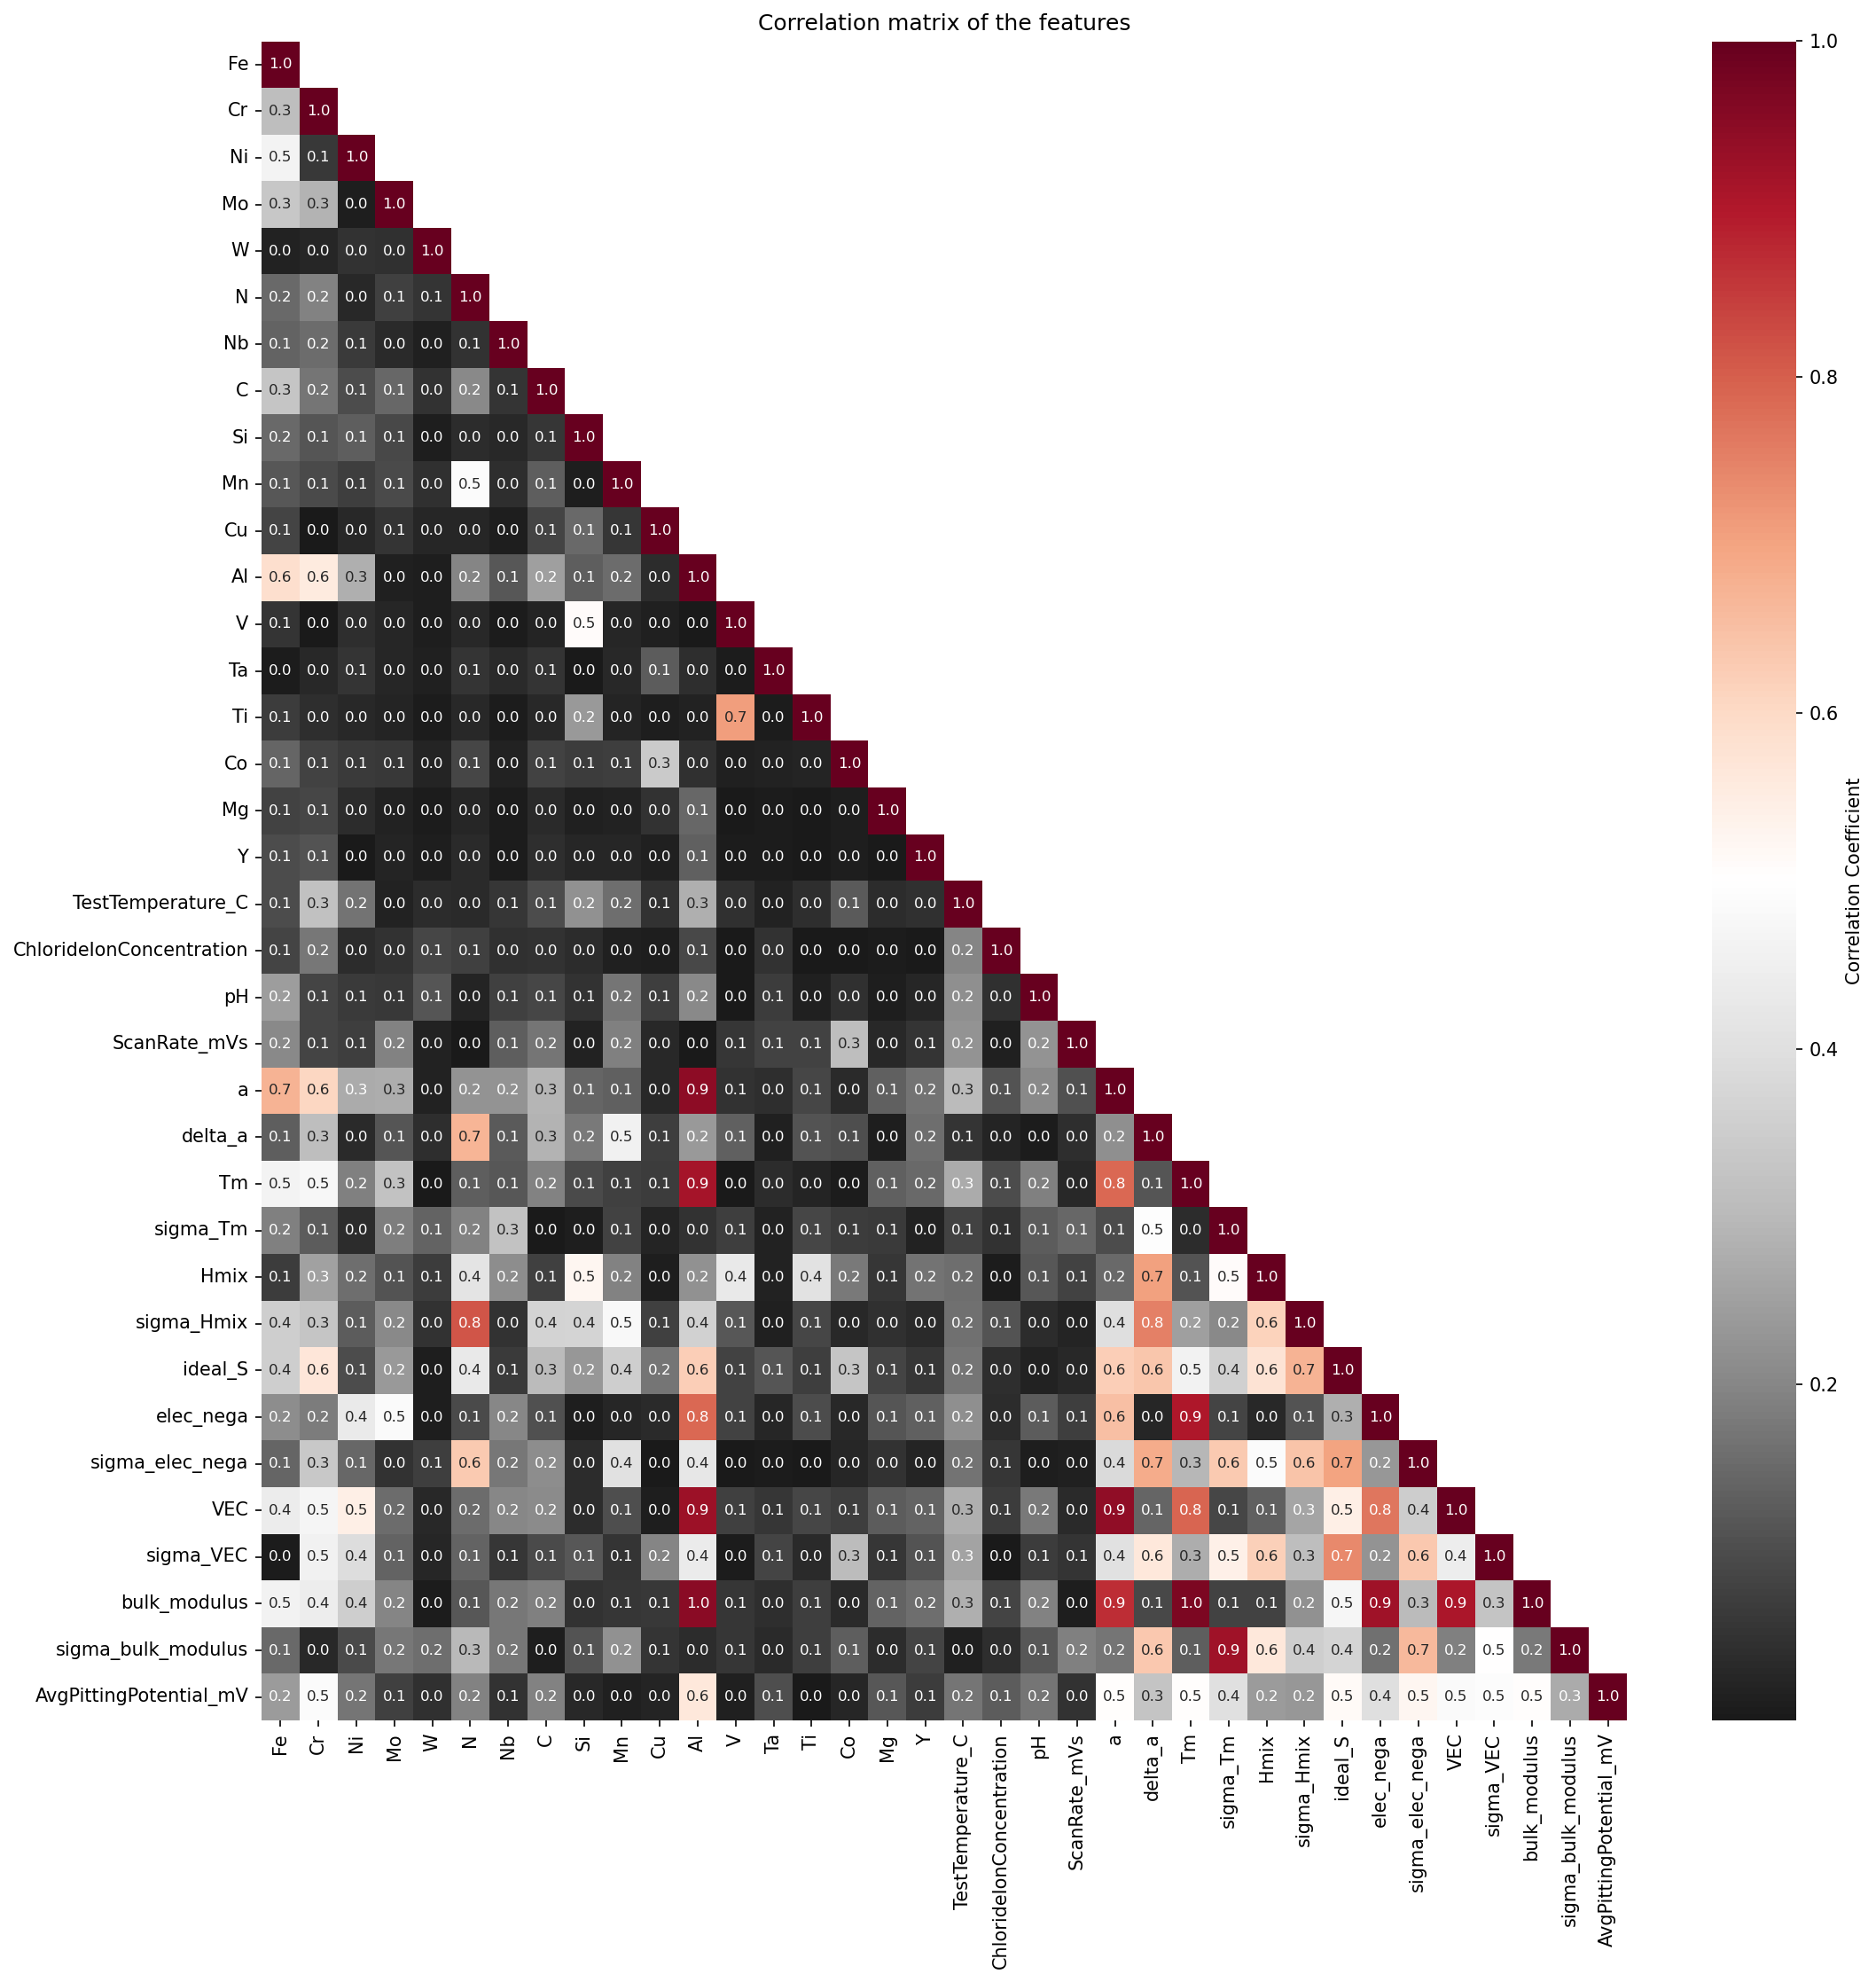

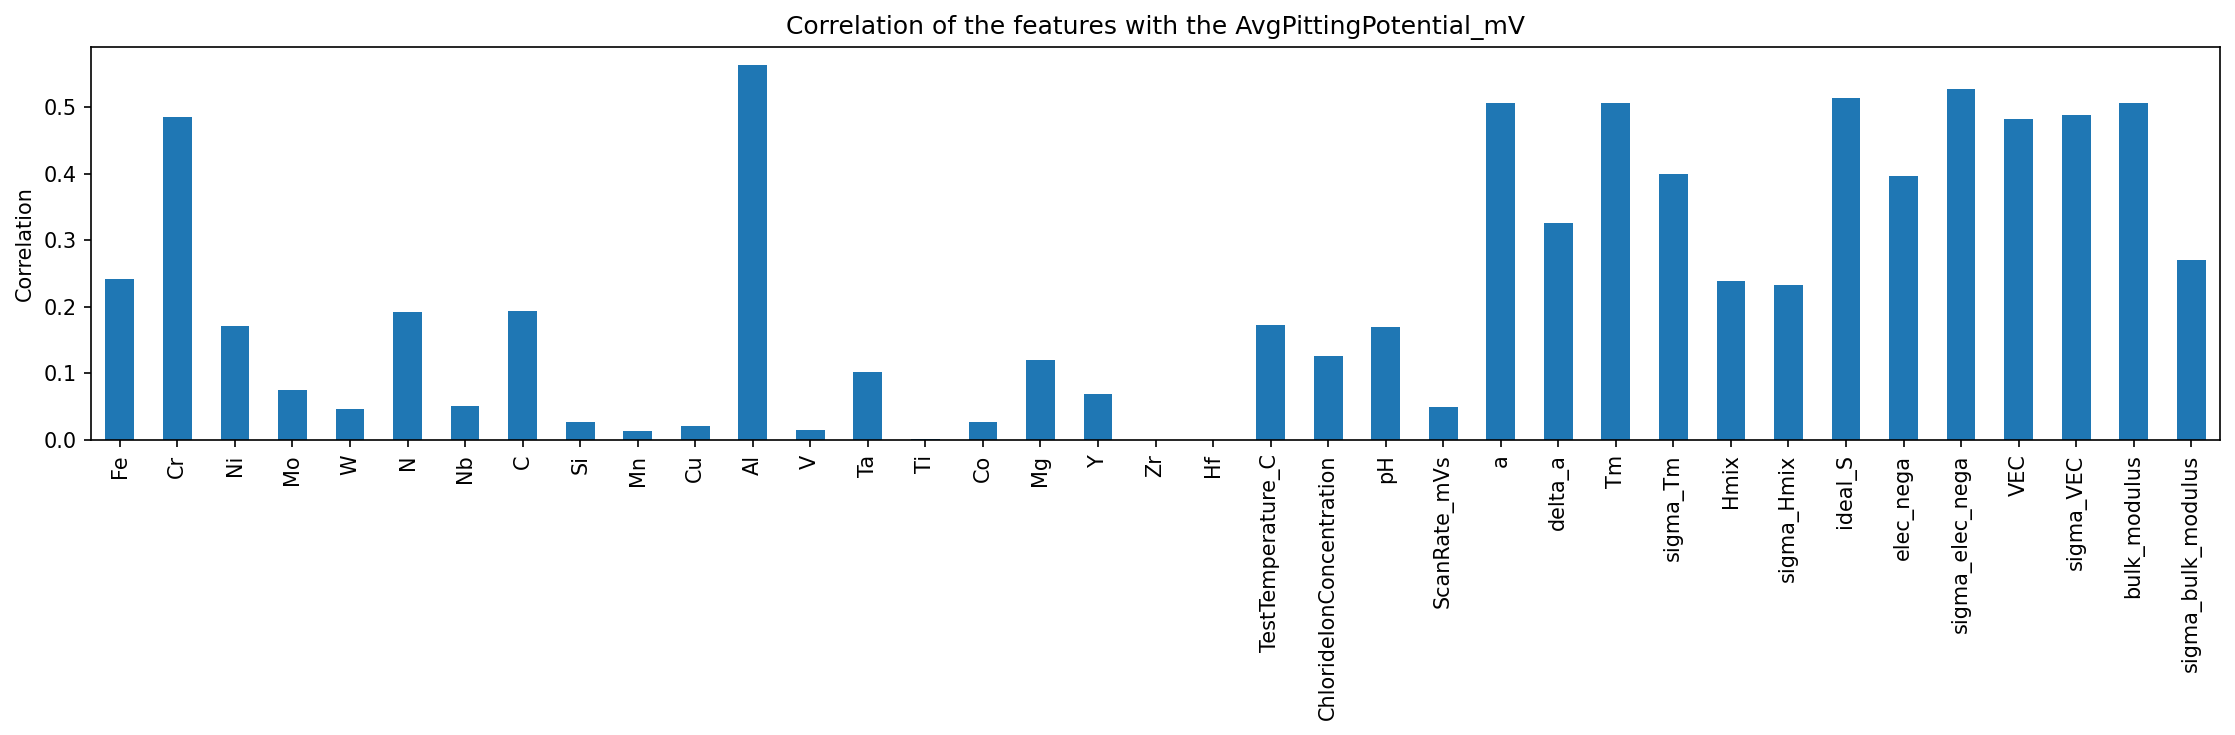

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate DataFrames
df_C = pd.concat([df_C_compo, df_C_specific_testing,
                 df_C_specific_features, df_C_output], axis=1)
display(df_C.head(1))

# Compute absolute correlation matrix
corr_matrix_C = df_C.corr().abs()

# Remove NaN columns and rows
corr_matrix_C = corr_matrix_C.loc[:, ~corr_matrix_C.isna().all(axis=0)]
corr_matrix_C = corr_matrix_C.loc[~corr_matrix_C.isna().all(axis=1), :]

# Create a mask with True in all the cells. We'll only set the diagonal to False in the next step.
mask = np.triu(np.ones_like(corr_matrix_C, dtype=bool))

# Set the diagonal to False (these are the cells we want to keep)
np.fill_diagonal(mask, False)

# Plot correlation heatmap
plt.figure(figsize=(15, 15), dpi=150)
sns.heatmap(corr_matrix_C, mask = mask, annot=True, fmt=".1f", cmap='RdGy_r',
            cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={"size": 8})
plt.title("Correlation matrix of the features")
plt.tight_layout()
plt.show()

# Compute and plot correlations with the target variable
plt.figure(figsize=(15, 5), dpi=150)
df_C.drop('AvgPittingPotential_mV', axis=1).apply(lambda x: x.corr(
    df_C['AvgPittingPotential_mV'])).abs().plot(kind='bar')
plt.title("Correlation of the features with the AvgPittingPotential_mV")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

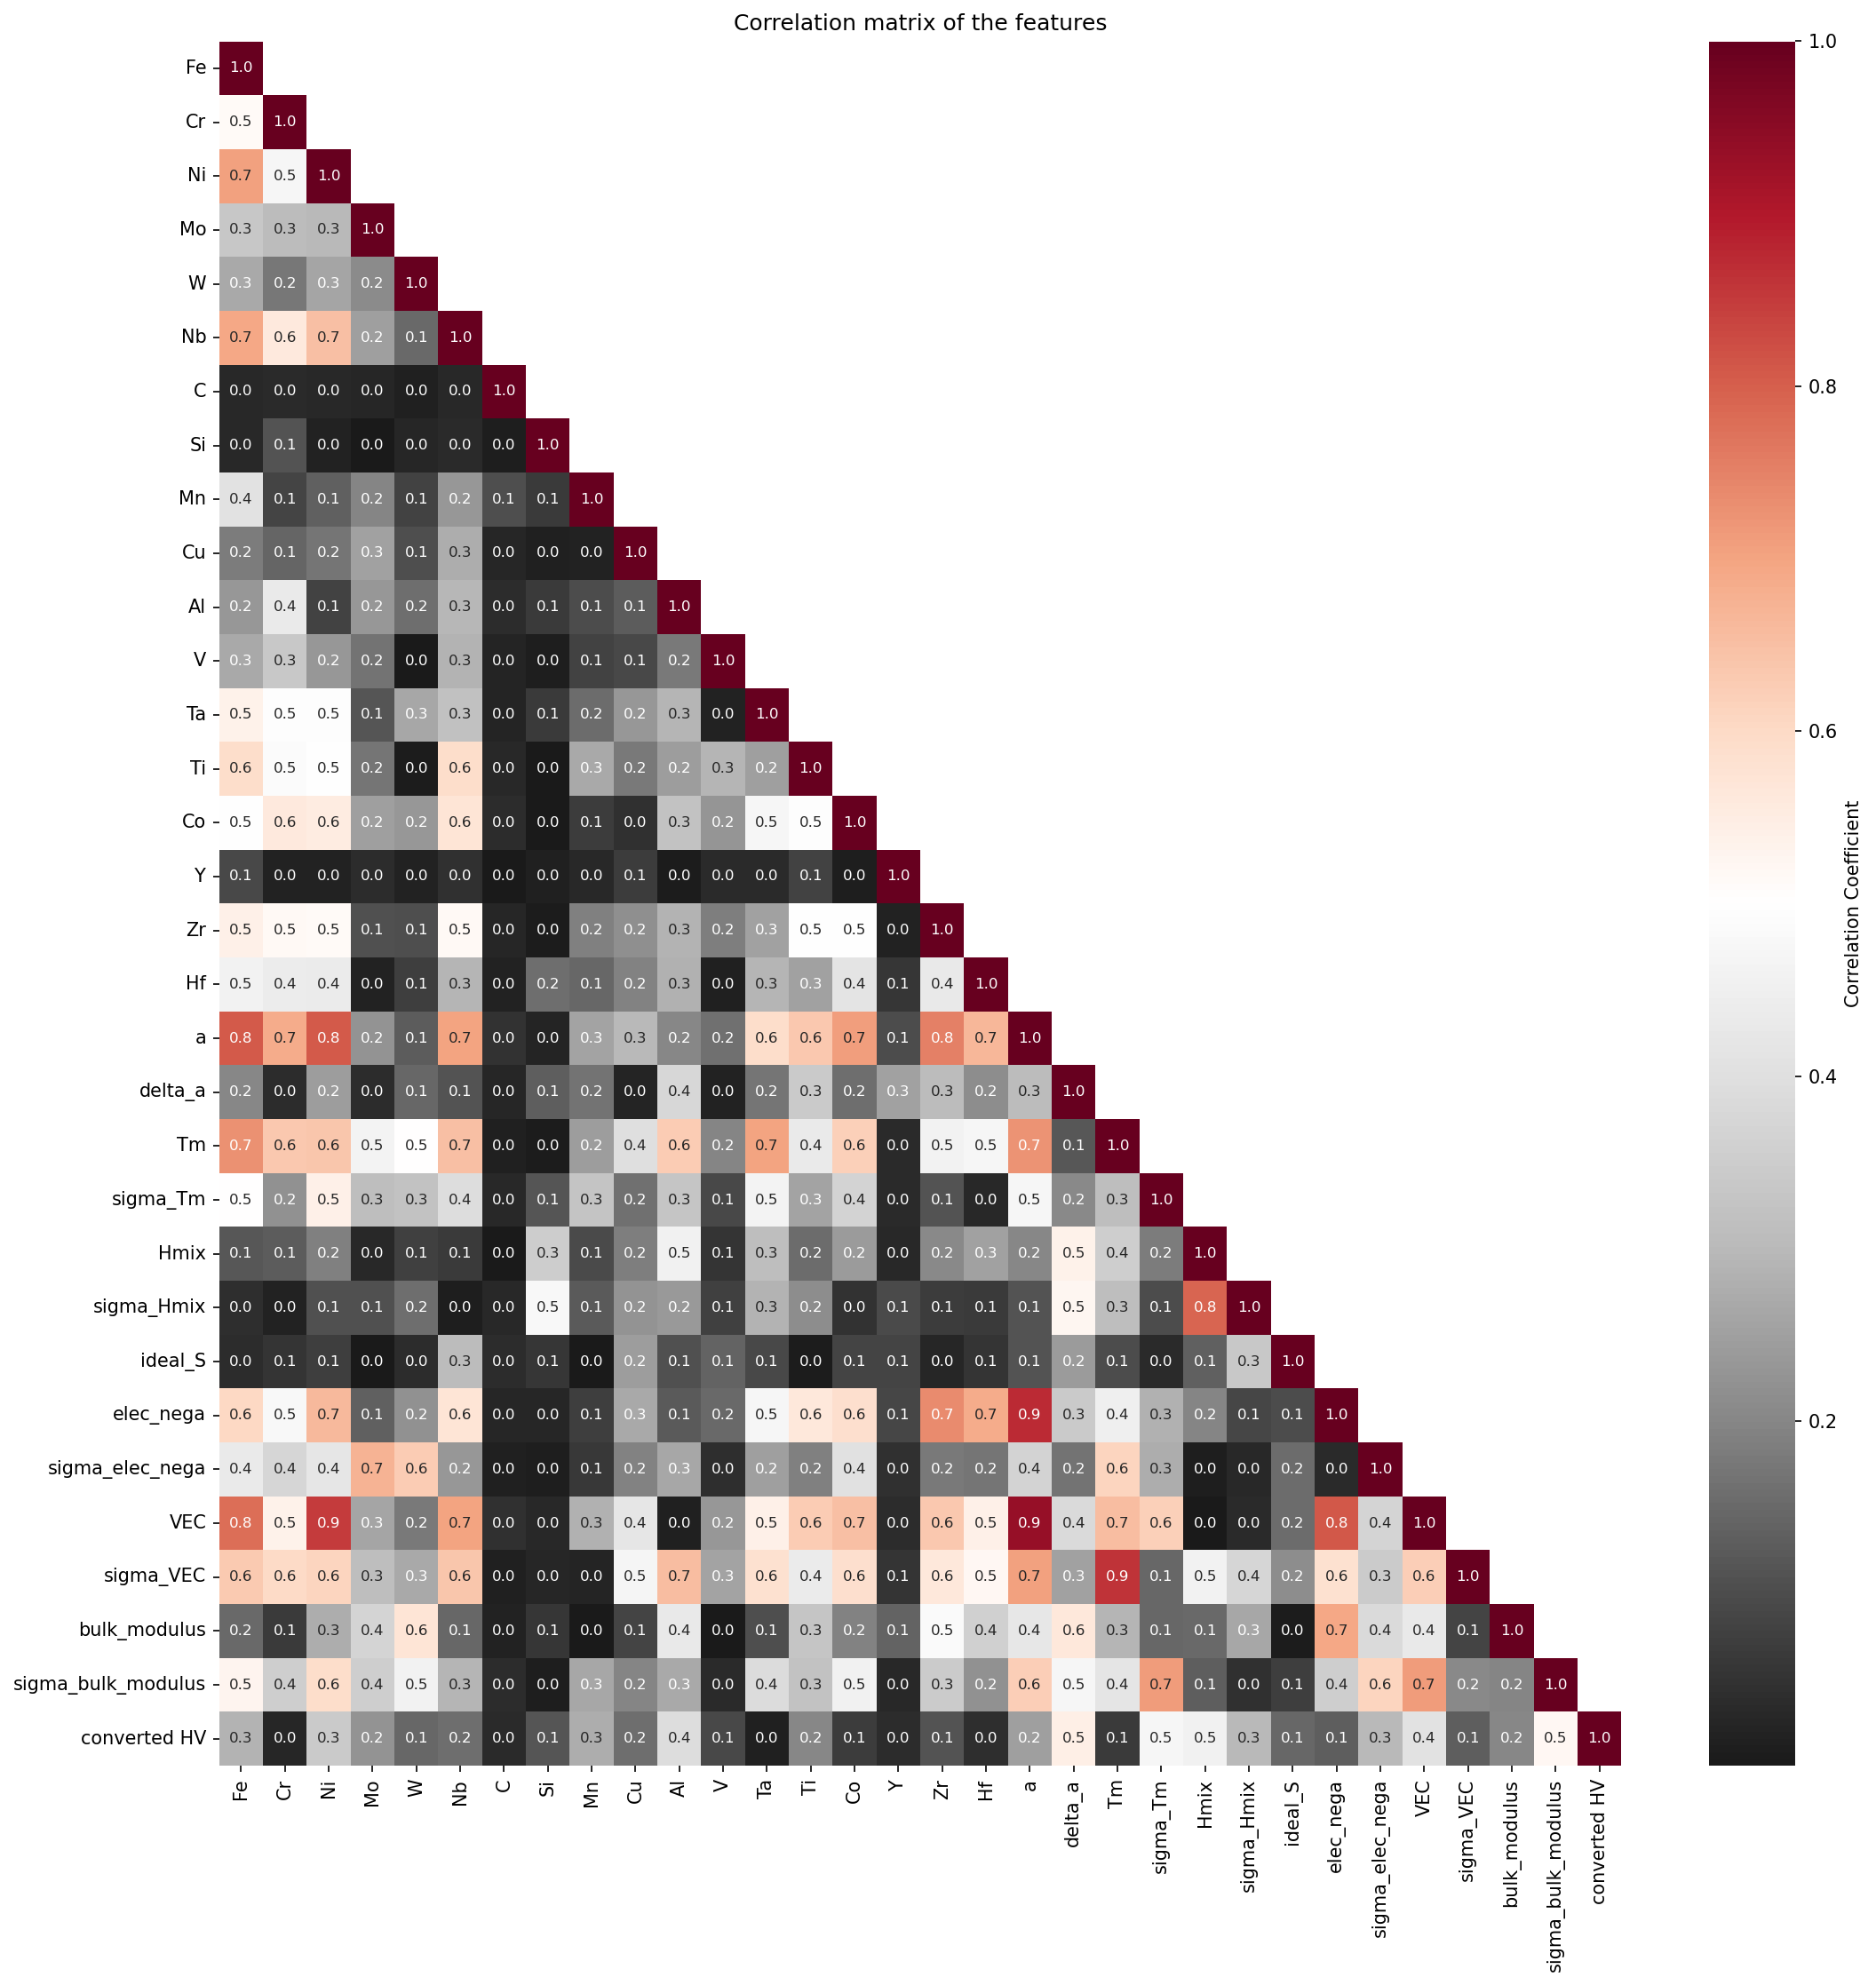

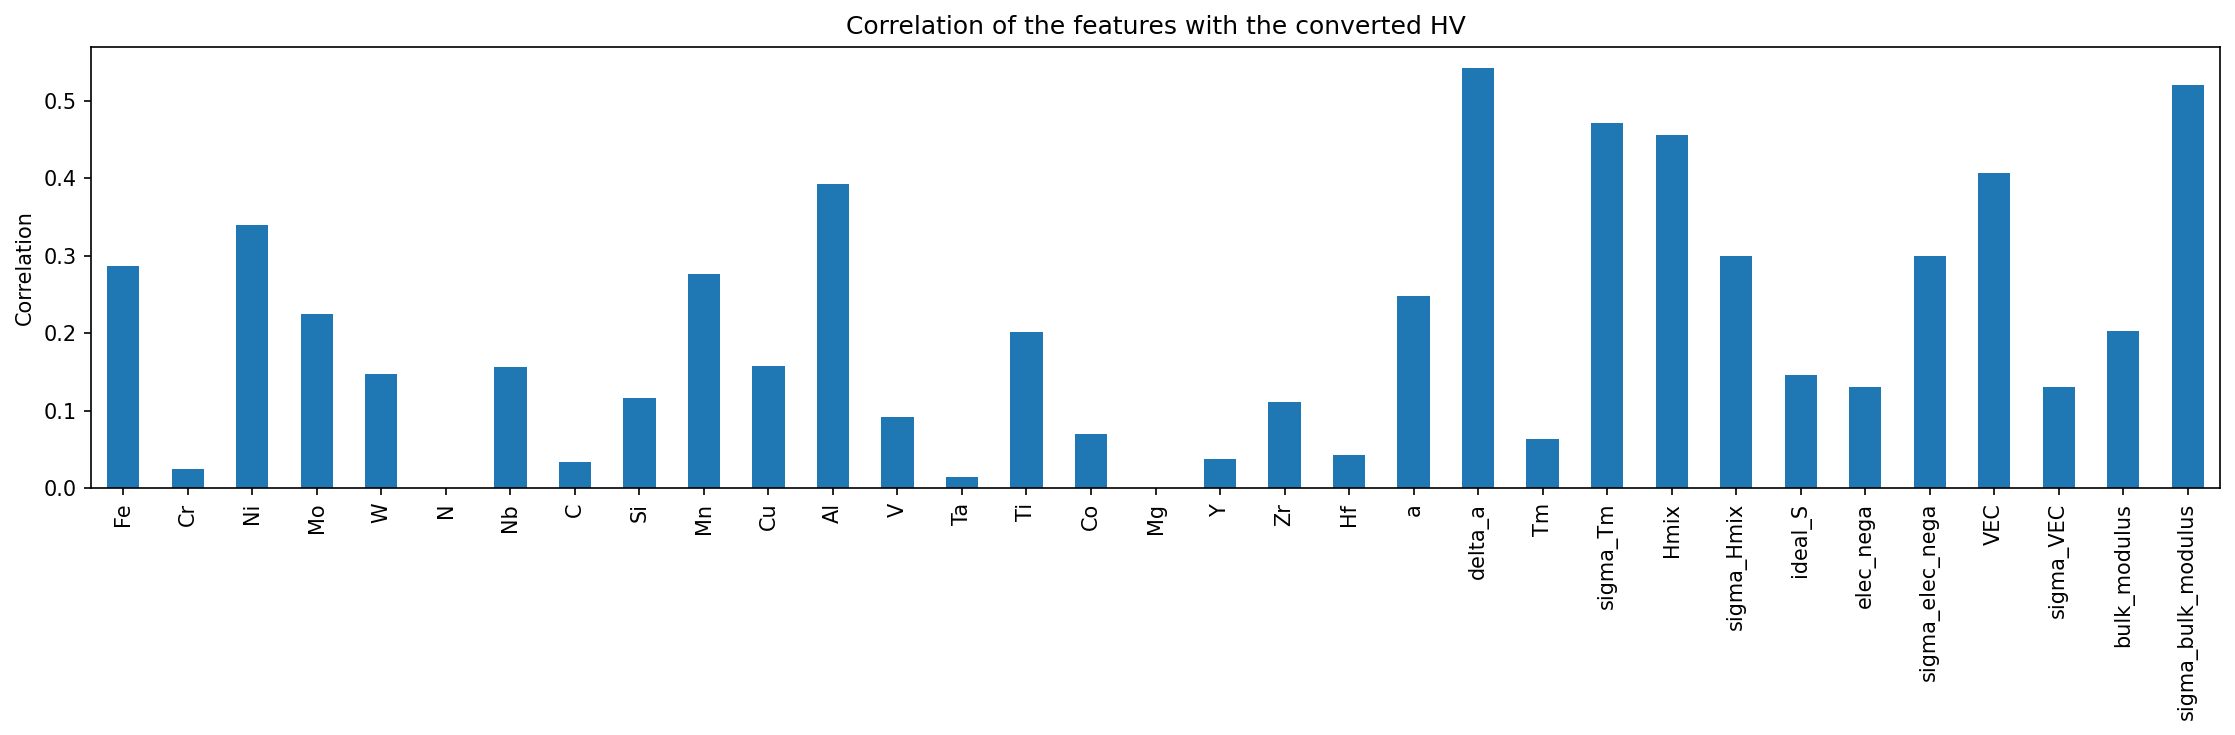

In [5]:
import numpy as np

# Concatenate DataFrames
df_H = pd.concat([df_H_compo, df_H_specific_features, df_H_output], axis=1)

# Compute absolute correlation matrix
corr_matrix_H = df_H.corr().abs()

# Remove NaN columns and rows
corr_matrix_H = corr_matrix_H.loc[:, ~corr_matrix_H.isna().all(axis=0)]
corr_matrix_H = corr_matrix_H.loc[~corr_matrix_H.isna().all(axis=1), :]

# Create a mask with True in all the cells. We'll only set the diagonal to False in the next step.
mask = np.triu(np.ones_like(corr_matrix_H, dtype=bool))

# Set the diagonal to False (these are the cells we want to keep)
np.fill_diagonal(mask, False)

# Plot correlation heatmap
plt.figure(figsize=(15, 15), dpi=150)

# Use the mask in the heatmap
sns.heatmap(corr_matrix_H, mask=mask, annot=True, fmt=".1f", cmap='RdGy_r',
            cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={"size": 8})

plt.title("Correlation matrix of the features")
plt.tight_layout()
plt.show()

# Compute and plot correlations with the target variable
plt.figure(figsize=(15, 5), dpi=150)
df_H.drop('converted HV', axis=1).apply(lambda x: x.corr(
    df_H['converted HV'])).abs().plot(kind='bar')
plt.title("Correlation of the features with the converted HV")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()


## Feature selection

### Data Normalization

performs MinMax scaling on multiple datasets to prepare them as inputs for a Neural Network, concatenates certain scaled datasets for model training


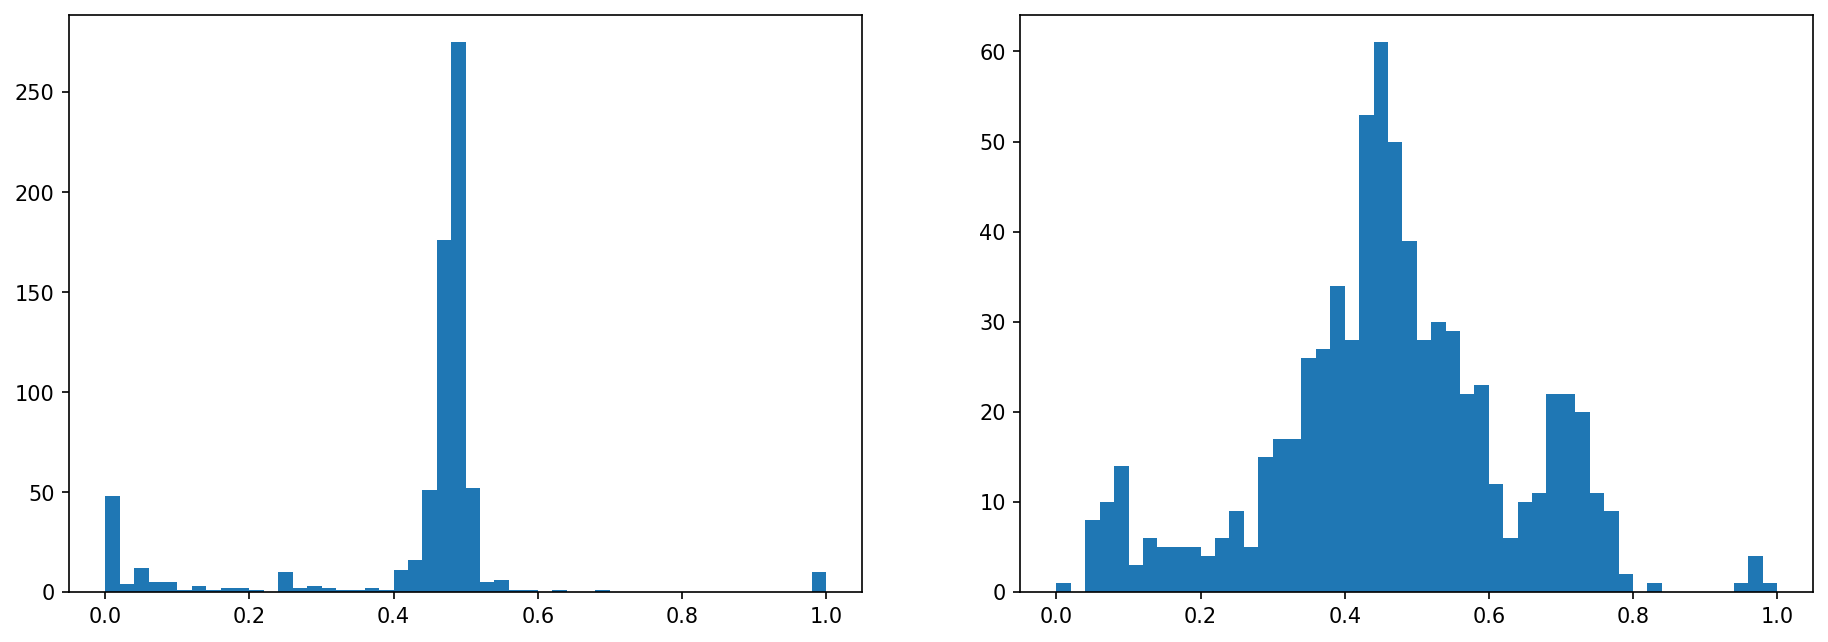

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# Prepare data for NN
dfs = [df_H_compo, df_H_specific_features, df_H_output,
       df_C_compo, df_C_specific_testing, df_C_specific_features, df_C_output]

# Convert DataFrames to numpy arrays
inputs_outputs = [np.asarray(df.values) for df in dfs]

# Define each variable
X1, Y1, H1, X2, Z2, W2, C2 = inputs_outputs

# Initialize MinMaxScalers for each data set
scalers = {
    "compo": MinMaxScaler(),
    "H_specific_features": MinMaxScaler(),
    "H_output": MinMaxScaler(),
    "C_specific_testing": MinMaxScaler(),
    "C_specific_features": MinMaxScaler(),
    "C_output": MinMaxScaler()
}

# Fit scalers to appropriate data
scalers["compo"].fit(np.concatenate((X1, X2)))
scalers["H_specific_features"].fit(Y1)
scalers["H_output"].fit(H1.reshape((-1, 1)))
scalers["C_specific_testing"].fit(Z2)
scalers["C_specific_features"].fit(W2)
scalers["C_output"].fit(C2.reshape((-1, 1)))

# Apply transformations
X1_norm = scalers["compo"].transform(X1)
Y1_norm = scalers["H_specific_features"].transform(Y1)
H1_norm = scalers["H_output"].transform(H1.reshape((-1, 1)))

X2_norm = scalers["compo"].transform(X2)
Z2_norm = scalers["C_specific_testing"].transform(Z2)
W2_norm = scalers["C_specific_features"].transform(W2)
C2_norm = scalers["C_output"].transform(C2.reshape((-1, 1)))

# Prepare final input data for model training
X_H_norm = np.concatenate((X1_norm, Y1_norm), axis=1)
X_C_norm = np.concatenate((X2_norm, Z2_norm, W2_norm), axis=1)

# Plot distribution of target variables
plt.figure(figsize=(15, 5), dpi=150)
plt.subplot(1, 2, 1)
plt.hist(W2_norm[:, 2], bins=50)  # Distribution of one of the features

plt.subplot(1, 2, 2)
plt.hist(C2_norm, bins=50)  # Distribution of target variable
plt.show()

### Building and Evaluating Random Forest Regression Models

trains and evaluates a Random Forest Regression model using 6-fold cross-validation on two sets of normalized data ('H' and 'C'), outputting the R^2 scores for each fold and their means.


In [7]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

kf = KFold(n_splits=6, random_state=0, shuffle=True)

def train_and_evaluate(X, y, model_name):
    models, scores = [], []
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.ravel()[
            train_index], y.ravel()[test_index]

        model = RandomForestRegressor(random_state=0,
                                      n_estimators=300,
                                      max_features=20,
                                      max_depth=10,
                                      min_samples_split=2,
                                      min_samples_leaf=4,
                                      bootstrap=True)
        model.fit(X_train, y_train)
        models.append(model)
        scores.append(r2_score(y_test, model.predict(X_test)))

    # print the model performance mean and std
    print(f"{model_name} R^2 scores Mean: {np.mean(scores)} Std: {np.std(scores)}")
    return models


models_H = train_and_evaluate(X_H_norm, H1_norm, 'H')
models_C = train_and_evaluate(X_C_norm, C2_norm, 'C')

H R^2 scores Mean: 0.6774038283764314 Std: 0.03738383459598693
C R^2 scores Mean: 0.7123354168289877 Std: 0.05245826256741934


In [8]:
print(models_H[0])

RandomForestRegressor(max_depth=10, max_features=20, min_samples_leaf=4,
                      n_estimators=300, random_state=0)


### Random Forest Hyperparameter Tuning

performs hyperparameter tuning and training of Random Forest Regressor models using K-fold cross-validation, evaluates model performance with R^2 scores, and calculates permutation feature importance for two target variables ('H' and 'C') with the same input features.

for the small dataset and I will only split into train and test data based on cross-validation: model score + feature importance are evaluated based on the test data.

be careful with overfitting: comparing the model score of the training data and the test data


In [9]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Set up the k-fold cross-validation
kf = KFold(n_splits=6, random_state=0, shuffle=True)

# Define a function to create, train, and evaluate a Random Forest model
def hyperevaluate_train_model(X, y, model_name):
    (models, scores_train, scores_test, 
     permu_importances_train, permu_importances_test) = [], [], [], [], []

    param_distributions = {
        'n_estimators': [50, 100, 150], # less trees to reduce overfitting
        'max_features': [1, 'log2', 'sqrt'], 
        'max_depth': [4, 6, 8], # smaller to reduce overfitting
        'min_samples_split': [5, 10, 15], # larger to reduce overfitting 
        'min_samples_leaf': [6, 8, 10], # larger to reduce overfitting
        # 'bootstrap': [True, False]
    }

    rf = RandomForestRegressor(random_state=0)
    random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                       n_iter=100, cv=kf, scoring='r2', verbose=0, random_state=0, n_jobs=-1)
    # the model uses the KFold to estimate the average r2 score by testing dataset
    random_search.fit(X, y.ravel())

    print(f"Best parameters for {model_name}:", random_search.best_params_)
    print(f"Best score for {model_name}:", random_search.best_score_)

    # Now with best parameters, train and evaluate
    for train_index, test_index in kf.split(X):

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.ravel()[
            train_index], y.ravel()[test_index]

        # Now build model with best parameters
        model_best = RandomForestRegressor(
            **random_search.best_params_, random_state=0)
        model_best.fit(X_train, y_train)

        models.append(model_best)
        scores_train.append(r2_score(y_train, model_best.predict(X_train)))
        scores_test.append(r2_score(y_test, model_best.predict(X_test)))

        # Calculate permutation feature importance
        permu_importance_train = permutation_importance(
            model_best, X_train, y_train, n_repeats=50, random_state=42, n_jobs=-1)
        permu_importances_train.append(permu_importance_train)
        
        permu_importance_test = permutation_importance(
            model_best, X_test, y_test, n_repeats=50, random_state=42, n_jobs=-1)
        permu_importances_test.append(permu_importance_test)


    print(f"{model_name} R^2 scores_train Mean: {np.mean(scores_train)}, Std: {np.std(scores_train)}")
    print(f"{model_name} R^2 scores_test Mean: {np.mean(scores_test)}, Std: {np.std(scores_test)}")
    print(f"--------------------------------------------------")
    return models, random_search.best_params_, permu_importances_train, permu_importances_test


# Use the function to create, evaluate both models, and calculate importances
(models_H, models_H_best_params, permu_importances_train_H, permu_importances_test_H) = hyperevaluate_train_model(X_H_norm, H1_norm, 'H')
(models_C, models_C_best_params, permu_importances_train_C, permu_importances_test_C) = hyperevaluate_train_model(X_C_norm, C2_norm, 'C')

Best parameters for H: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 8}
Best score for H: 0.6513664382515097
H R^2 scores_train Mean: 0.7715564795134067, Std: 0.006547688823273012
H R^2 scores_test Mean: 0.6513664382515097, Std: 0.03177229953986869
--------------------------------------------------
Best parameters for C: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 8}
Best score for C: 0.6787038486172433
C R^2 scores_train Mean: 0.7916312317142379, Std: 0.009797787597648292
C R^2 scores_test Mean: 0.6787038486172433, Std: 0.05468787106521112
--------------------------------------------------


Generate a set of four subplots displaying box plots overlapped with error bars, showing permutation feature importances across different datasets (Train H, Test H, Train C, Test C), each derived from 6-fold cross-validation.

Compare the permutation feature importances between training data and testing data


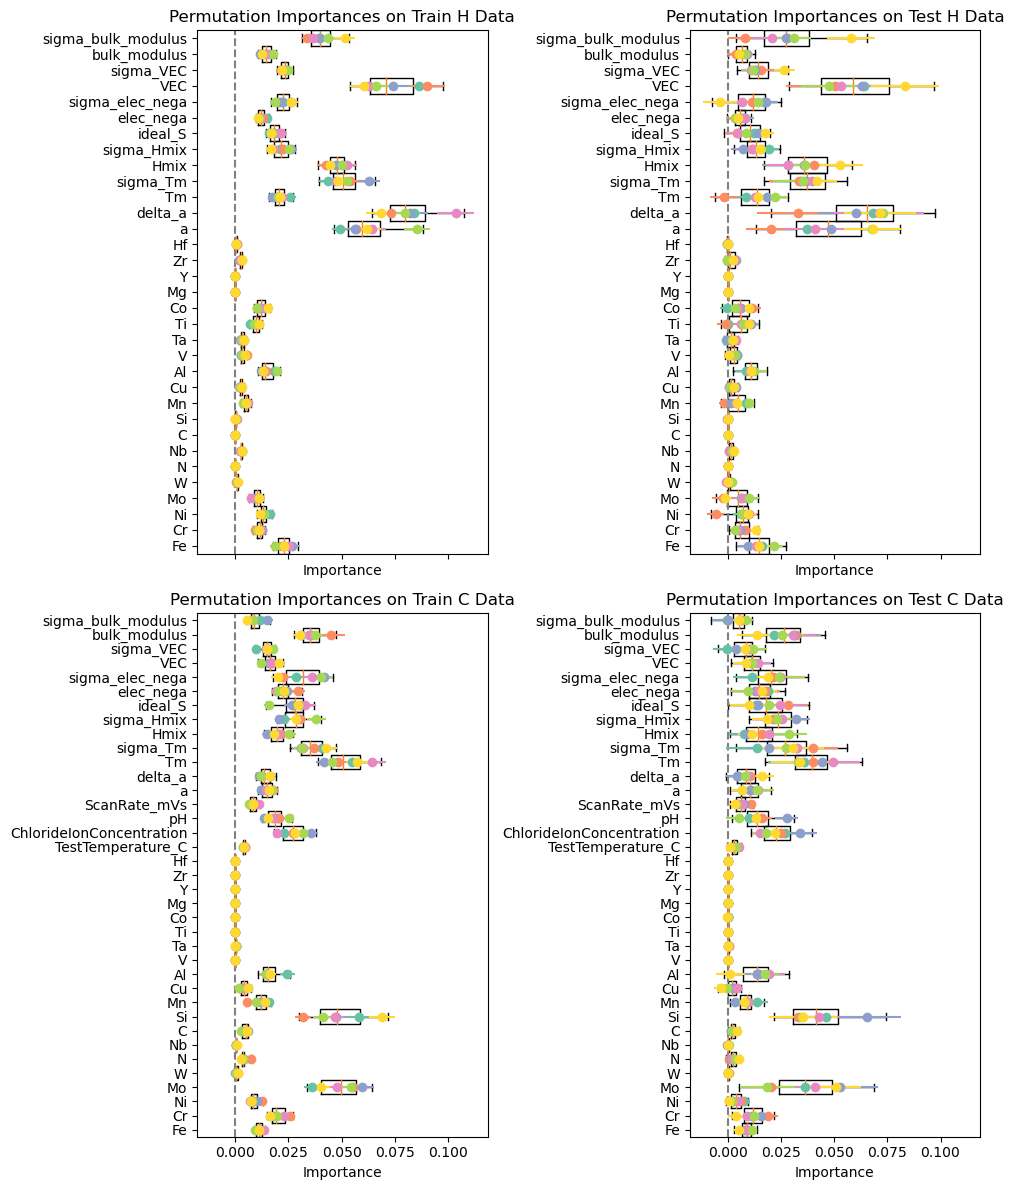

In [10]:
def plot_permutation_importances(datasets, feature_names_H, feature_names_C): 
    # Initialize subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 12), sharex=True)

    # Define color palette
    colors = sns.color_palette("Set2", 6)

    # Consolidate feature names
    feature_names_list = [feature_names_H, feature_names_H, feature_names_C, feature_names_C]

    # Iterate through each dataset to generate respective subplots
    for ax, (permu_importances, data_label), feature_names in zip(axs.ravel(), datasets, feature_names_list):
        
        # Initialize dataframe for Kfold importances
        importances_df_Kfold = pd.DataFrame()

        # Generate data for each fold
        for i in range(0, 6):
            importances_df = pd.DataFrame(permu_importances[i].importances.T, columns=feature_names)
            
            # Concatenate current fold importances to Kfold dataframe
            importances_df_Kfold = pd.concat([importances_df_Kfold, importances_df], axis=0)

            # Calculate mean and standard deviation for importances
            means = importances_df.mean()
            errors = importances_df.std()

            # Generate error bars for each feature
            for j, mean_val in enumerate(means):
                ax.errorbar(mean_val, j, xerr=errors[j], marker='o', color=colors[i], zorder=2)
        
        # Generate boxplot overlapping with error bars
        ax.boxplot(importances_df_Kfold, vert=False, whis=[5, 95], positions=range(len(importances_df_Kfold.columns)), showfliers=False, widths=1, zorder=1)
        
        # Draw zero-importance line
        ax.axvline(x=0, linestyle='--', color='grey', zorder=1)

        # Set y-ticks and labels
        ax.set_yticks(range(len(importances_df_Kfold.columns)))
        ax.set_yticklabels(importances_df_Kfold.columns)

        # Set x-label and subplot title
        ax.set_xlabel('Importance')
        ax.set_title(f'Permutation Importances on {data_label} Data')

    # Optimize layout and display plot
    plt.tight_layout()
    plt.show()

# Prepare datasets
datasets = [
    (permu_importances_train_H, 'Train H'),
    (permu_importances_test_H, 'Test H'),
    (permu_importances_train_C, 'Train C'),
    (permu_importances_test_C, 'Test C')]

# Define feature names
feature_names_H = df_H_compo.columns.append(df_H_specific_features.columns).tolist()
feature_names_C = df_C_compo.columns.append(df_C_specific_testing.columns).append(df_C_specific_features.columns).tolist()

# Execute function
plot_permutation_importances(datasets, feature_names_H, feature_names_C)


### Recursive Feature Elimination to reduce the redundant features

1. Creates and utilizes machine learning pipelines to handle data pre-processing and model fitting for two different models ('H' and 'C'). The pipelines include a recursive feature elimination with cross-validation (RFECV) step, which selects the optimal set of features for the Random Forest Regressor. The features are divided into two sets: 'fixed features' that are not subjected to elimination and 'elimination features' that RFECV evaluates.

Be careful: RFE doesn't evaluate feature correlations


How does RFECV work?

1. RFECV begins by training the model on all available features and computes a cross-validated score. This score is a measure of the model's predictive performance.
2. RFECV then eliminates one or more of the least important features (as determined by feature importances that the model provides). The model is retrained on the remaining features, and the cross-validated score is computed again.
3. This process of eliminating features, retraining the model, and computing the score continues until all features have been eliminated.
4. At the end of this process, RFECV has a record of the cross-validated score for each subset of features. It then selects the subset that provided the highest score.


In [11]:
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# This function creates a pipeline that includes recursive feature elimination with cross-validation (RFECV).
# The pipeline first transforms the input data using a column transformer that simply passes through the 'fixed_features'
# and applies RFECV to the 'elimination_features'. The transformed data is then used to train a Random Forest Regressor.
def create_pipeline_rfe(best_params, fixed_features, elimination_features, kf, df_rfe, target):

    # The 'elimination_pipeline' performs RFECV with a RandomForestRegressor as the base estimator.
    elimination_pipeline = Pipeline(steps=[
        ('rfecv', RFECV(estimator=RandomForestRegressor(**best_params, random_state=0), cv=kf, scoring='r2', verbose=False, n_jobs=-1))
    ])

    # The 'preprocessor' is a column transformer that applies different preprocessing to different subsets of the features.
    # The 'fixed_features' are left as they are ('passthrough'), while RFECV is applied to the 'elimination_features'.
    preprocessor = make_column_transformer(
        ('passthrough', fixed_features),
        (elimination_pipeline, elimination_features)
    )

    # The 'pipeline' first applies the 'preprocessor' to the input data, then fits a RandomForestRegressor to the transformed data.
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('reg', RandomForestRegressor(**best_params, random_state=0))
    ])

    # Prepare the training data for the pipeline and fit the pipeline to the data.
    X_norm_rfe = df_rfe[fixed_features + elimination_features]
    target_norm_rfe = target.ravel()
    pipeline.fit(X_norm_rfe, target_norm_rfe)

    return pipeline

# Prepare the feature set for model_H. 
# The 'fixed_features_H' are the features that will not be subjected to feature elimination.
# The 'elimination_features_H' are the features that will be subjected to RFECV.
fixed_features_H = df_H_compo.columns.tolist()
elimination_features_H = df_H_specific_features.columns.tolist()
df_H_rfe = pd.concat([pd.DataFrame(X1_norm, columns=fixed_features_H), 
                      pd.DataFrame(Y1_norm, columns=elimination_features_H)], axis=1)
# Use the 'create_pipeline_rfe' function to create a pipeline for model_H and fit it to the data.
pipeline_H = create_pipeline_rfe(models_H_best_params, fixed_features_H, elimination_features_H, kf, df_H_rfe, H1_norm)

# Similar to the steps for model_H, prepare the feature set for model_C and create and fit a pipeline for it.
fixed_features_C = df_C_compo.columns.tolist() + df_C_specific_testing.columns.tolist()
elimination_features_C = df_C_specific_features.columns.tolist()
df_C_feature_rfe = pd.concat([pd.DataFrame(np.concatenate([X2_norm, Z2_norm], axis =1), columns=fixed_features_C), 
                              pd.DataFrame(W2_norm, columns=elimination_features_C)], axis=1)
pipeline_C = create_pipeline_rfe(models_C_best_params, fixed_features_C, elimination_features_C, kf, df_C_feature_rfe, C2_norm)


2. Visualize the feature selection process. It retrieves and prints the final selected features for both models. The code then plots the cross-validation score (r2) achieved by the model against the number of features selected. This visualization helps to understand how feature selection impacts the performance of the model.


all engineered features H : ['a', 'delta_a', 'Tm', 'sigma_Tm', 'Hmix', 'sigma_Hmix', 'ideal_S', 'elec_nega', 'sigma_elec_nega', 'VEC', 'sigma_VEC', 'bulk_modulus', 'sigma_bulk_modulus'] in total 13 features
Selected features H: ['a' 'delta_a' 'Tm' 'sigma_Tm' 'Hmix' 'sigma_Hmix' 'sigma_elec_nega' 'VEC'
 'sigma_VEC' 'bulk_modulus' 'sigma_bulk_modulus'] in total 11 features
--------------------------------------
all engineered features C: ['a', 'delta_a', 'Tm', 'sigma_Tm', 'Hmix', 'sigma_Hmix', 'ideal_S', 'elec_nega', 'sigma_elec_nega', 'VEC', 'sigma_VEC', 'bulk_modulus', 'sigma_bulk_modulus'] in total 13 features
Selected features C: ['a' 'delta_a' 'Tm' 'sigma_Tm' 'Hmix' 'sigma_Hmix' 'ideal_S' 'elec_nega'
 'sigma_elec_nega' 'VEC' 'sigma_VEC' 'bulk_modulus' 'sigma_bulk_modulus'] in total 13 features


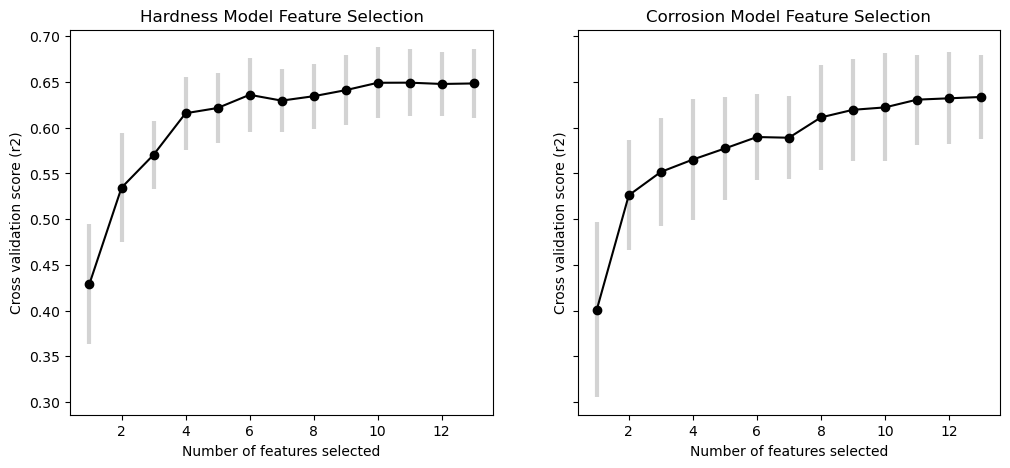

In [12]:
# Access the mask of selected features from the RFECV step in the pipeline.
selected_features_mask_H = pipeline_H.named_steps['preprocessor'].transformers_[1][1].named_steps['rfecv'].support_
selected_features_H = np.array(elimination_features_H)[selected_features_mask_H]

selected_features_mask_C = pipeline_C.named_steps['preprocessor'].transformers_[1][1].named_steps['rfecv'].support_
selected_features_C = np.array(elimination_features_C)[selected_features_mask_C]

# Print the selected features.
print(f'all engineered features H : {elimination_features_H} in total {len(elimination_features_H)} features')
print(f'Selected features H: {selected_features_H} in total {len(selected_features_H)} features')
print('--------------------------------------')
print(f'all engineered features C: {elimination_features_C} in total {len(elimination_features_C)} features')
print(f'Selected features C: {selected_features_C} in total {len(selected_features_C)} features')

# Create a range representing the number of features from 1 to the total number of features in the elimination set.
num_features_H = range(1, len(pipeline_H.named_steps['preprocessor'].transformers_[1][1].named_steps['rfecv'].cv_results_['mean_test_score']) + 1)
num_features_C = range(1, len(pipeline_C.named_steps['preprocessor'].transformers_[1][1].named_steps['rfecv'].cv_results_['mean_test_score']) + 1)


# create a subplot with 1 row and 2 column
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

ax1.set_xlabel("Number of features selected")
ax1.set_ylabel("Cross validation score (r2)")
ax1.set_title("Hardness Model Feature Selection")  # Set the title for the first subplot

ax2.set_xlabel("Number of features selected")
ax2.set_ylabel("Cross validation score (r2)")
ax2.set_title("Corrosion Model Feature Selection")  # Set the title for the second subplot

# Create an errorbar plot. The mean cross-validation score and its standard deviation are obtained from the `cv_results_` attribute of RFECV.

ax1.errorbar(num_features_H,
             pipeline_H.named_steps['preprocessor'].transformers_[1][1].named_steps['rfecv'].cv_results_['mean_test_score'],
             yerr=pipeline_H.named_steps['preprocessor'].transformers_[1][1].named_steps['rfecv'].cv_results_['std_test_score'],
             fmt='o-', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

ax2.errorbar(num_features_C,
             pipeline_C.named_steps['preprocessor'].transformers_[1][1].named_steps['rfecv'].cv_results_['mean_test_score'],
             yerr=pipeline_C.named_steps['preprocessor'].transformers_[1][1].named_steps['rfecv'].cv_results_['std_test_score'],
             fmt='o-', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
plt.show()

### 2nd Round: Random Forest Hyperparameter Tuning

only use the features screened by RFECV


Selected features HC: ['a' 'delta_a' 'Tm' 'sigma_Tm' 'Hmix' 'sigma_Hmix' 'sigma_elec_nega' 'VEC'
 'sigma_VEC' 'bulk_modulus' 'sigma_bulk_modulus'] in total 11 features
Best parameters for H: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 8}
Best score for H: 0.6518274727614378
H R^2 scores_train Mean: 0.7700677259446582, Std: 0.006171769825268288
H R^2 scores_test Mean: 0.6518274727614378, Std: 0.036946825481237566
--------------------------------------------------
Best parameters for C: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 8}
Best score for C: 0.6825026505398114
C R^2 scores_train Mean: 0.7868184186700821, Std: 0.009255649639234101
C R^2 scores_test Mean: 0.6825026505398114, Std: 0.055700302994817874
--------------------------------------------------


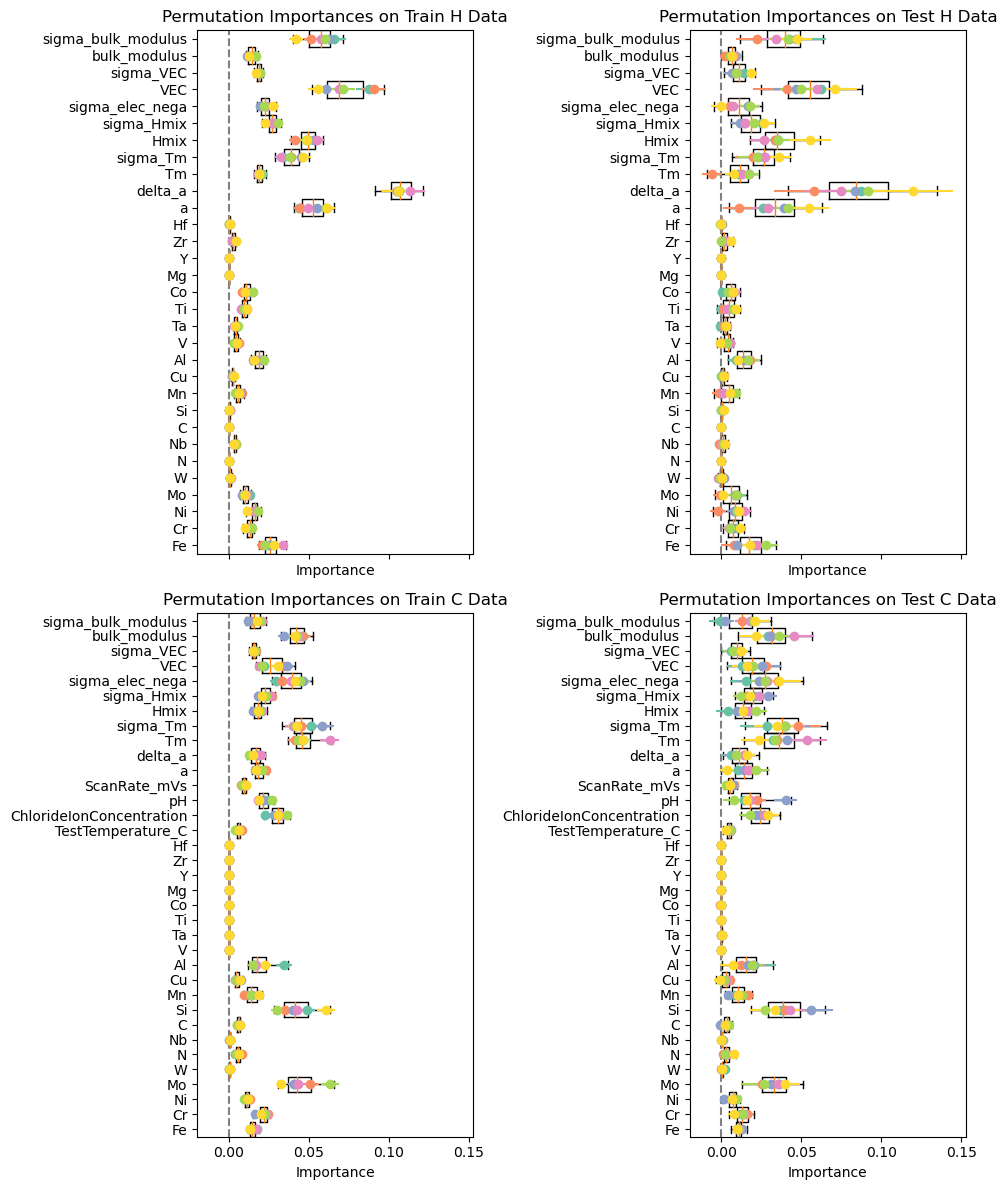

In [13]:
# Create a combined feature mask for both models (HC) by performing a bitwise AND operation on the individual feature masks.
selected_features_mask_HC = selected_features_mask_H & selected_features_mask_C

# Print the features selected for both models (HC) and their total count.
print(f'Selected features HC: {np.array(elimination_features_C)[selected_features_mask_HC]} in total {len(np.array(elimination_features_C)[selected_features_mask_HC])} features')

# Prepare the final input data for both models by only including the selected features.
X_H_norm_sel = np.concatenate((X1_norm, Y1_norm[:, selected_features_mask_HC]), axis=1)
X_C_norm_sel = np.concatenate((X2_norm, Z2_norm, W2_norm[:, selected_features_mask_HC]), axis=1)

# Use the custom function 'hyperevaluate_train_model' to create and evaluate both models (H and C),
# and to calculate feature importances. The function returns the trained models, their best hyperparameters,
# and the permutation importances for both the training and test sets.
(models_H_sel, models_H_best_params_sel, permu_importances_train_H_sel, permu_importances_test_H_sel) = hyperevaluate_train_model(X_H_norm_sel, H1_norm, 'H')
(models_C_sel, models_C_best_param_sel, permu_importances_train_C_sel, permu_importances_test_C_sel) = hyperevaluate_train_model(X_C_norm_sel, C2_norm, 'C')


# Data for subplots
datasets_sel = [
    (permu_importances_train_H_sel, 'Train H'),
    (permu_importances_test_H_sel, 'Test H'),
    (permu_importances_train_C_sel, 'Train C'),
    (permu_importances_test_C_sel, 'Test C')]

feature_names_H_sel = df_H_compo.columns.append(df_H_specific_features.columns[selected_features_mask_HC]).tolist()
feature_names_C_sel = df_C_compo.columns.append(df_C_specific_testing.columns).append(df_C_specific_features.columns[selected_features_mask_HC]).tolist()

# Plot the subplots
plot_permutation_importances(datasets_sel, feature_names_H_sel, feature_names_C_sel)


### Feature Importance Calculation by Random Forest and Permutation

determines and visualizes the importance of features for two datasets (hardness and corrosion), using data from several models, by creating a bar plot with error bars that represent the standard deviation of the calculated importance values.


In [14]:
# Initialize importance dataframes
df_importance_H_sel, df_importance_C_sel = pd.DataFrame(
    columns=feature_names_H_sel), pd.DataFrame(columns=feature_names_C_sel)

df_permu_importance_train_H_sel, df_permu_importance_train_C_sel = pd.DataFrame(
    columns=feature_names_H_sel), pd.DataFrame(columns=feature_names_C_sel)

# Populate importance dataframes
for i, (model_H_sel, model_C_sel, permu_importance_train_H_sel, permu_importance_train_C_sel) in enumerate(zip(models_H_sel, models_C_sel, permu_importances_train_H_sel, permu_importances_train_C_sel)):

    df_importance_H_sel.loc[i] = model_H_sel.feature_importances_
    df_importance_C_sel.loc[i] = model_C_sel.feature_importances_

    # print(permu_importance_train_H)

    df_permu_importance_train_H_sel = pd.concat([df_permu_importance_train_H_sel, pd.DataFrame(
        permu_importance_train_H_sel.importances_mean.reshape(1, -1), columns=feature_names_H_sel)])
    df_permu_importance_train_C_sel = pd.concat([df_permu_importance_train_C_sel, pd.DataFrame(
        permu_importance_train_C_sel.importances_mean.reshape(1, -1), columns=feature_names_C_sel)])

# display(df_permu_importance_train_H_sel.shape)
# display(df_permu_importance_train_C_sel.shape)

# Calculate mean and std for each feature importance
df_importance_H_sel.loc['mean'], df_importance_H_sel.loc['std'] = df_importance_H_sel.mean(
), df_importance_H_sel.std()
df_importance_C_sel.loc['mean'], df_importance_C_sel.loc['std'] = df_importance_C_sel.mean(
), df_importance_C_sel.std()
df_permu_importance_train_H_sel.loc['mean'], df_permu_importance_train_H_sel.loc['std'] = df_permu_importance_train_H_sel.mean(
), df_permu_importance_train_H_sel.std()
df_permu_importance_train_C_sel.loc['mean'], df_permu_importance_train_C_sel.loc['std'] = df_permu_importance_train_C_sel.mean(
), df_permu_importance_train_C_sel.std()

# Select specific features
df_importance_eng_H_sel = df_importance_H_sel[df_H_specific_features.columns[selected_features_mask_HC]]
df_importance_eng_C_sel = df_importance_C_sel[df_C_specific_features.columns[selected_features_mask_HC]]
df_permu_importance_train_eng_H_sel = df_permu_importance_train_H_sel[df_H_specific_features.columns[selected_features_mask_HC]]
df_permu_importance_train_eng_C_sel = df_permu_importance_train_C_sel[df_C_specific_features.columns[selected_features_mask_HC]]

Visualizes the feature importances derived from tree-based models for 'Hardness' and 'Corrosion' properties, using bar plots with error bars, to facilitate the comparison of feature relevance between the two models.


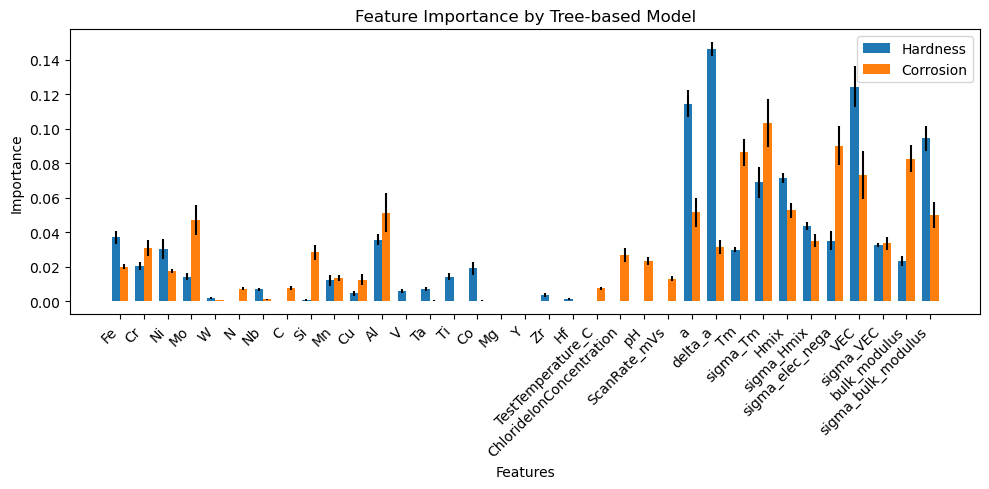

In [15]:
# Plot feature importances from tree-based models

# Synchronize feature names with importance data
df_importance_H_full_sel = pd.DataFrame(columns=feature_names_C_sel)
df_importance_H_full_sel = pd.concat([df_importance_H_full_sel, df_importance_H_sel], axis=0)
df_importance_H_full_sel.index = df_importance_H_sel.index

# Prepare plot
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(df_importance_H_full_sel.columns))

# Data and labels
data = [(df_importance_H_full_sel, 'Hardness'), (df_importance_C_sel, 'Corrosion')]

# Plot data with error bars
for i, (df, label) in enumerate(data):
    ax.bar(index + (i-0.5)*bar_width, df.loc['mean'], bar_width, yerr=df.loc['std'], label=label)

# Label and title
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance by Tree-based Model')

# Set x-axis labels with correct rotation
ax.set_xticks(index)
ax.set_xticklabels(df_importance_H_full_sel.columns, rotation=45, ha='right')

# Add legend
ax.legend()

# Tight layout and display
fig.tight_layout()
plt.show()


Visualizes the feature importances derived from tree-based models (only for engineered features).


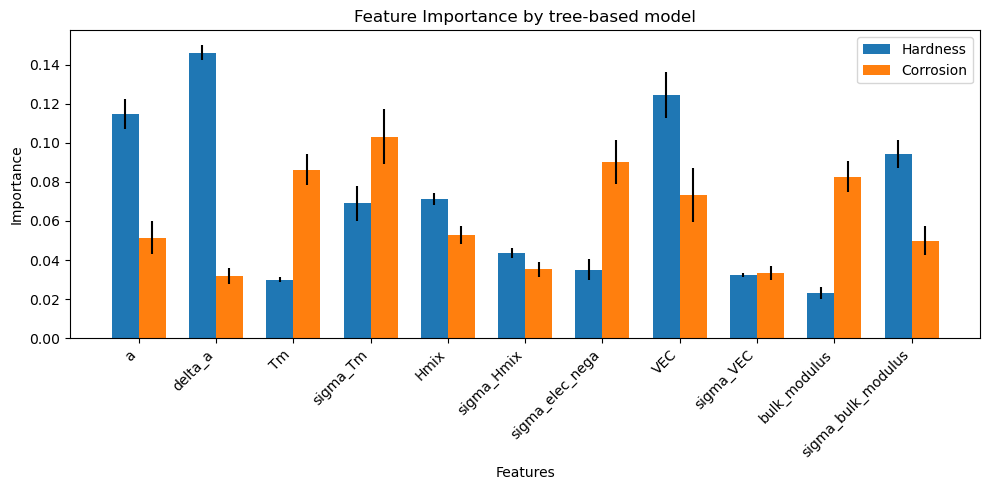

In [16]:
# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(df_importance_eng_H_sel.columns))

# Define data and labels
data = [(df_importance_eng_H_sel, 'Hardness'),
        (df_importance_eng_C_sel, 'Corrosion')]

# Add bars for each dataset
for i, (df, label) in enumerate(data):
    ax.bar(index + (i-0.5)*bar_width,
           df.loc['mean'], bar_width, yerr=df.loc['std'], label=label)

# Add labels and title
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance by tree-based model')
ax.set_xticks(index)
# set x-axis label rotation and alignment
ax.set_xticklabels(df_importance_eng_H_sel.columns, rotation=45, ha='right')
ax.legend()

# Display plot
fig.tight_layout()
plt.show()

### Permutation Feature Importance


Visualizes the Permutation Feature Importances for 'Hardness' and 'Corrosion' properties


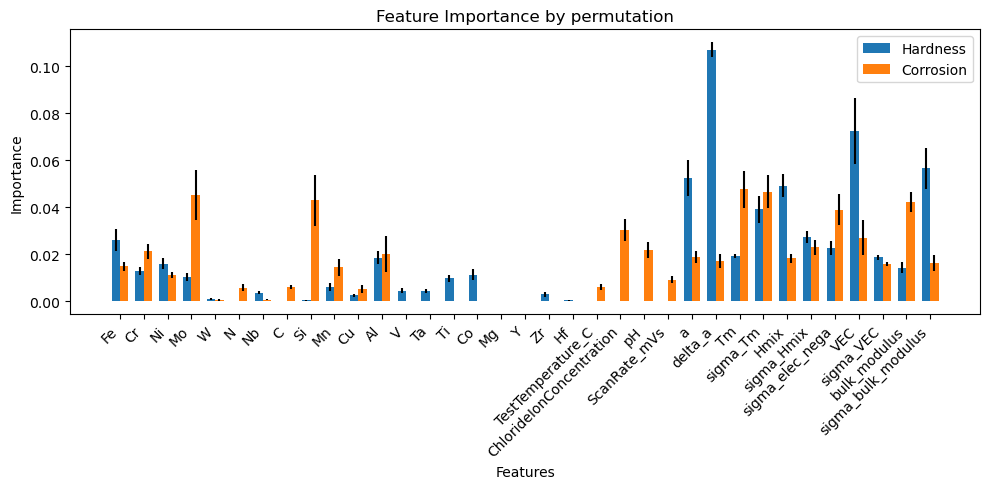

In [17]:
# Plot permutation feature importances

# match the feature importance with the feature names
df_permu_importance_train_H_full_sel = pd.DataFrame(columns=feature_names_C_sel)
df_permu_importance_train_H_full_sel = pd.concat(
    [df_permu_importance_train_H_full_sel, df_permu_importance_train_H_sel], axis=0)
df_permu_importance_train_H_full_sel.index = df_permu_importance_train_H_sel.index

# display(df_permu_importance_train_H_full_sel)

fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(df_permu_importance_train_H_full_sel.columns))

# Define data and labels
data = [(df_permu_importance_train_H_full_sel, 'Hardness'),
        (df_permu_importance_train_C_sel, 'Corrosion')]

# Add bars for each dataset
for i, (df, label) in enumerate(data):
    ax.bar(index + (i-0.5)*bar_width,
           df.loc['mean'], bar_width, yerr=df.loc['std'], label=label)

# Add labels and title
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance by permutation')
ax.set_xticks(index)
# set x-axis label rotation and alignment
ax.set_xticklabels(df_permu_importance_train_H_full_sel.columns, rotation=45, ha='right')
ax.legend()

# Display plot
fig.tight_layout()
plt.show()

Visualizes the Permutation Feature Importances for 'Hardness' and 'Corrosion' properties (only for engineered features)


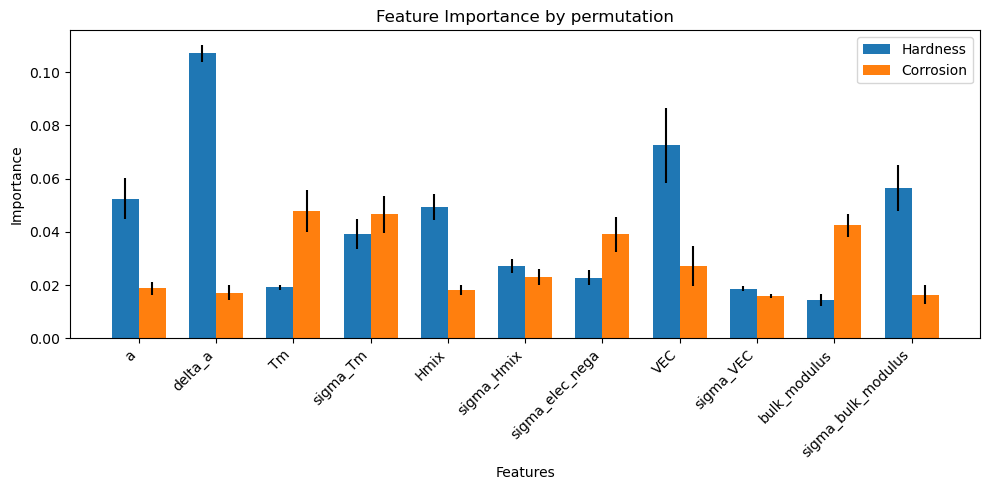

In [18]:
# Plot permutation feature importances
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(df_permu_importance_train_eng_H_sel.columns))

# Define data and labels
data = [(df_permu_importance_train_eng_H_sel, 'Hardness'),
        (df_permu_importance_train_eng_C_sel, 'Corrosion')]

# Add bars for each dataset
for i, (df, label) in enumerate(data):
    ax.bar(index + (i-0.5)*bar_width,
           df.loc['mean'], bar_width, yerr=df.loc['std'], label=label)

# Add labels and title
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance by permutation')
ax.set_xticks(index)
# set x-axis label rotation and alignment
ax.set_xticklabels(df_permu_importance_train_eng_H_sel.columns, rotation=45, ha='right')
ax.legend()

# Display plot
fig.tight_layout()
plt.show()

In [19]:
# # Select top N features based on mean importance for both models
# N = 8
# top_features_H = df_permu_importance_train_eng_H_sel.loc['mean'].nlargest(
#     N).index.tolist()
# top_features_C = df_permu_importance_train_eng_C_sel.loc['mean'].nlargest(
#     N).index.tolist()

# # Find common features
# common_features = list(set(top_features_H) & set(top_features_C))

# print(f"Top {N} features for 'H': {top_features_H}")
# print(f"Top {N} features for 'C': {top_features_C}")
# print(f"Common features: {common_features}")

### Joint feature importance

Combine the mean importance data from two models into a DataFrame, normalizes the importance scores, creates a consensus score, reduces the DataFrame to selected features, sorts the features based on the consensus score, and visualizes the sorted feature importances using a bar plot.


,delta_a,VEC,sigma_Tm,sigma_bulk_modulus,a,Tm,Hmix,sigma_elec_nega,bulk_modulus,sigma_Hmix,sigma_VEC
mean_H,0.175533,0.118869,0.06431,0.092727,0.086116,0.031387,0.08077,0.03731,0.023413,0.044636,0.030588
mean_C,0.030011,0.047583,0.081988,0.028764,0.033071,0.083951,0.032114,0.06876,0.074647,0.040529,0.027804
consensus_score,0.102772,0.083226,0.073149,0.060746,0.059593,0.057669,0.056442,0.053035,0.04903,0.042583,0.029196


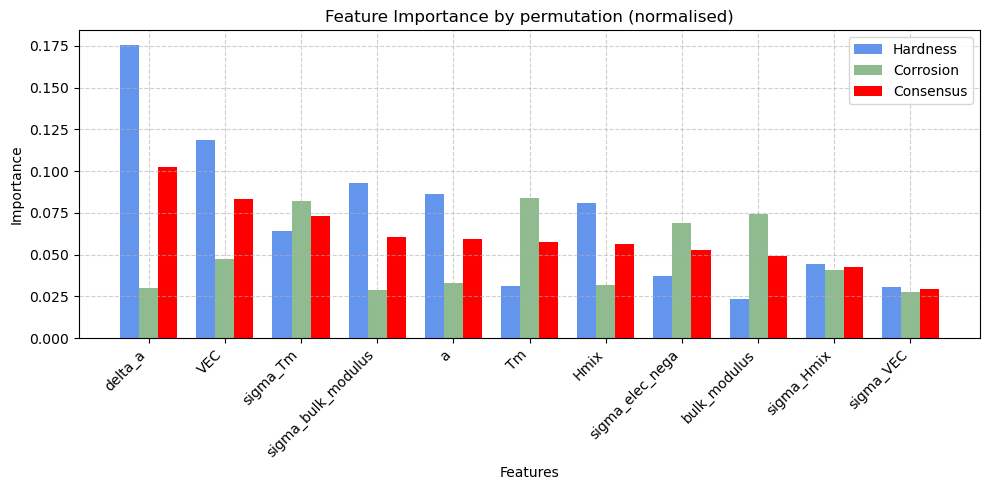

In [20]:
# Start by combining the mean importance data from both models into a single DataFrame
df_permu_importance_train_combined_sel = pd.DataFrame(
    index=['mean_H', 'mean_C'], columns=feature_names_C_sel)

# Assign mean importances to the DataFrame, filling NA values with zero
df_permu_importance_train_combined_sel.loc['mean_H'] = df_permu_importance_train_H_full_sel.loc['mean'].fillna(
    0)
df_permu_importance_train_combined_sel.loc['mean_C'] = df_permu_importance_train_C_sel.loc['mean'].fillna(
    0)

# Normalize the importance scores so that the total sum for each model is 1
df_permu_importance_train_combined_sel.loc['mean_H'] /= df_permu_importance_train_combined_sel.loc['mean_H'].sum()
df_permu_importance_train_combined_sel.loc['mean_C'] /= df_permu_importance_train_combined_sel.loc['mean_C'].sum()

# Create a 'consensus' score, which is the average of the importance scores from the two models
df_permu_importance_train_combined_sel.loc['consensus_score'] = (
    df_permu_importance_train_combined_sel.loc['mean_H'] + df_permu_importance_train_combined_sel.loc['mean_C']) / 2

# Reduce the DataFrame to only the features used in model H
df_permu_importance_train_eng_combined_sel = df_permu_importance_train_combined_sel[df_H_specific_features.columns[selected_features_mask_HC]]

# Sort the features according to the consensus score
df_permu_importance_train_eng_combined_sel_sorted = df_permu_importance_train_eng_combined_sel.sort_values(
    'consensus_score', ascending=False, axis=1)


display(df_permu_importance_train_eng_combined_sel_sorted)

# Now, let's visualize the sorted feature importances

# Define the figure and the axes
fig, ax = plt.subplots(figsize=(10, 5))

# Set the bar width and calculate the positions of the bars
bar_width = 0.25
index = np.arange(len(df_permu_importance_train_eng_combined_sel_sorted.columns))

# Prepare the data for plotting, along with labels and colors
data = [(df_permu_importance_train_eng_combined_sel_sorted.loc['mean_H'], 'Hardness', 'cornflowerblue'),
        (df_permu_importance_train_eng_combined_sel_sorted.loc['mean_C'], 'Corrosion', 'darkseagreen'),
        (df_permu_importance_train_eng_combined_sel_sorted.loc['consensus_score'], 'Consensus', 'red')]

# Plot each data series as a bar plot
for i, (df, label, color) in enumerate(data):
    ax.bar(index + i*bar_width, df, bar_width, label=label, color=color)

# Set the labels and title for the plot
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance by permutation (normalised)')

# Add gridlines to make the plot easier to read
ax.grid(True, linestyle='--', alpha=0.6)

# Set up the x-axis labels and ensure they're readable
ax.set_xticks(index + bar_width)
ax.set_xticklabels(
    df_permu_importance_train_eng_combined_sel_sorted.columns, rotation=45, ha='right')

# Position the legend in a good spot
ax.legend(loc='upper right')

# Make sure everything fits and then show the plot
fig.tight_layout()
plt.show()

### Multicollinearity and remove highly correlated features

Combines selected features from two datasets, calculates the correlation matrix, plots a heatmap of the correlations, identifies highly correlated feature pairs based on a threshold (0.8), and drops the less important features from the combined dataset.


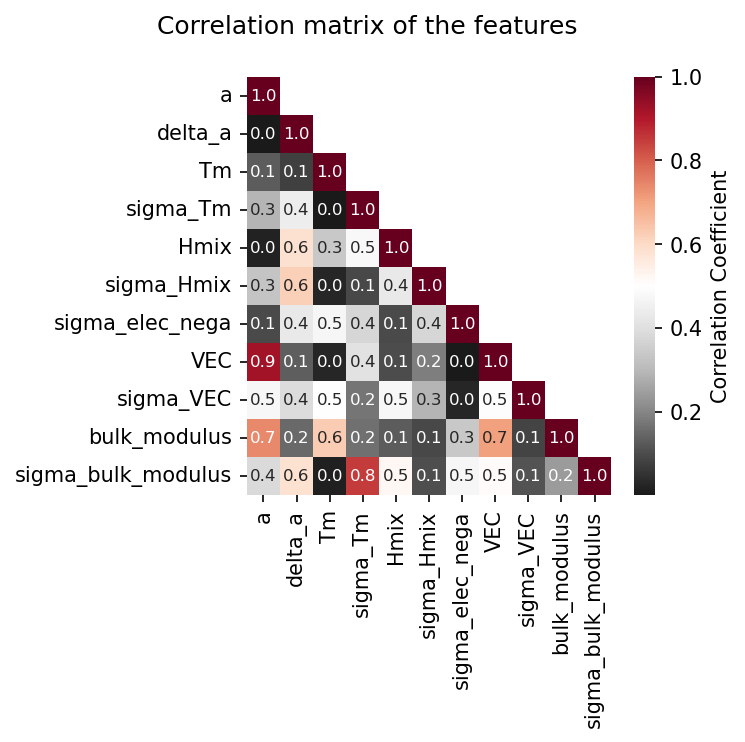

['a', 'delta_a', 'Tm', 'sigma_Tm', 'Hmix', 'sigma_Hmix', 'sigma_elec_nega', 'VEC', 'sigma_VEC', 'bulk_modulus', 'sigma_bulk_modulus']
['delta_a', 'VEC', 'sigma_Tm', 'Tm', 'Hmix', 'sigma_elec_nega', 'bulk_modulus', 'sigma_Hmix', 'sigma_VEC']


,delta_a,VEC,sigma_Tm,Tm,Hmix,sigma_elec_nega,bulk_modulus,sigma_Hmix,sigma_VEC
mean_H,0.175533,0.118869,0.06431,0.031387,0.08077,0.03731,0.023413,0.044636,0.030588
mean_C,0.030011,0.047583,0.081988,0.083951,0.032114,0.06876,0.074647,0.040529,0.027804
consensus_score,0.102772,0.083226,0.073149,0.057669,0.056442,0.053035,0.04903,0.042583,0.029196


In [21]:
# Combine selected features from H and C datasets
df_H_feature_sel_corr = pd.DataFrame(Y1_norm[:, selected_features_mask_HC], columns=df_H_specific_features.columns[selected_features_mask_HC])
df_C_feature_sel_corr = pd.DataFrame(W2_norm[:, selected_features_mask_HC], columns=df_C_specific_features.columns[selected_features_mask_HC])
df_HC_feature_sel_corr = pd.concat([df_H_feature_sel_corr, df_C_feature_sel_corr], axis=0)

# Calculate correlation matrix
corr_matrix_HC_feature_sel = df_HC_feature_sel_corr.corr().abs()

# Create a mask for upper triangular matrix
mask_HC_feature = np.triu(np.ones_like(corr_matrix_HC_feature_sel, dtype=bool))
np.fill_diagonal(mask_HC_feature, False)

# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
sns.heatmap(corr_matrix_HC_feature_sel, mask=mask_HC_feature, annot=True, fmt=".1f", cmap='RdGy_r',
            cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={"size": 8}, ax=ax)
fig.suptitle("Correlation matrix of the features")
plt.tight_layout()
plt.show()

# Get the column names of the correlation matrix
print(corr_matrix_HC_feature_sel.columns.to_list())

# Set correlation threshold
threshold = 0.8

# Identify highly correlated feature pairs
high_corr_pairs_HC = [(i,j) for i in range(len(corr_matrix_HC_feature_sel.columns)) 
                      for j in range(i+1, len(corr_matrix_HC_feature_sel.columns)) 
                      if corr_matrix_HC_feature_sel.iloc[i,j] > threshold]

# Identify features to drop based on correlation
features_to_drop_HC = set()

for pair in high_corr_pairs_HC:
    # Compare consensus scores and drop less important features
    if df_permu_importance_train_combined_sel.loc['consensus_score', corr_matrix_HC_feature_sel.columns[pair[0]]] > df_permu_importance_train_combined_sel.loc['consensus_score', corr_matrix_HC_feature_sel.columns[pair[1]]]:
        features_to_drop_HC.add(corr_matrix_HC_feature_sel.columns[pair[1]])
    else:
        features_to_drop_HC.add(corr_matrix_HC_feature_sel.columns[pair[0]])

# Drop highly correlated features from the combined DataFrame
df_permu_importance_train_eng_combined_sel_sorted_drop = df_permu_importance_train_eng_combined_sel_sorted.drop(columns=features_to_drop_HC)

# Get the column names of the updated DataFrame
print(df_permu_importance_train_eng_combined_sel_sorted_drop.columns.to_list())
display(df_permu_importance_train_eng_combined_sel_sorted_drop)

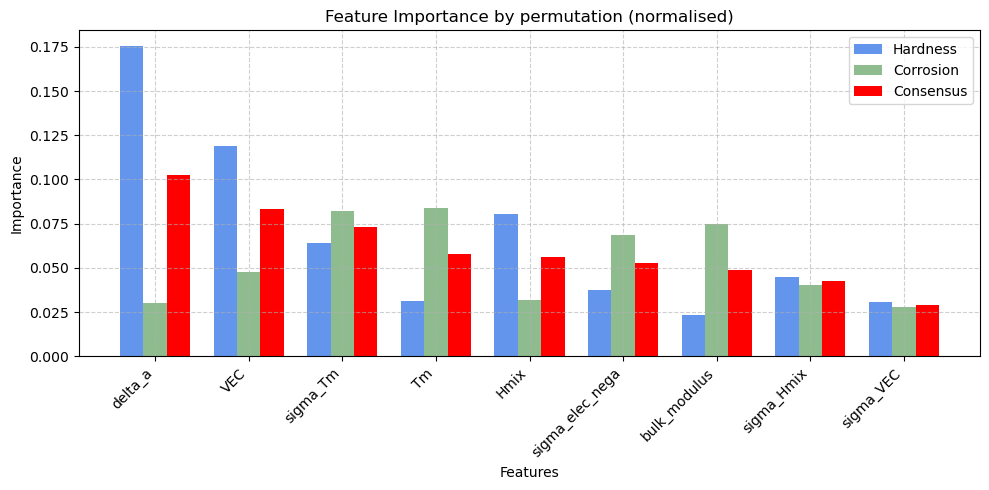

In [22]:
# Define the figure and the axes
fig, ax = plt.subplots(figsize=(10, 5))

# Set the bar width and calculate the positions of the bars
bar_width = 0.25
index = np.arange(len(df_permu_importance_train_eng_combined_sel_sorted_drop.columns))

# Prepare the data for plotting, along with labels and colors
data = [(df_permu_importance_train_eng_combined_sel_sorted_drop.loc['mean_H'], 'Hardness', 'cornflowerblue'),
        (df_permu_importance_train_eng_combined_sel_sorted_drop.loc['mean_C'], 'Corrosion', 'darkseagreen'),
        (df_permu_importance_train_eng_combined_sel_sorted_drop.loc['consensus_score'], 'Consensus', 'red')]

# Plot each data series as a bar plot
for i, (df, label, color) in enumerate(data):
    ax.bar(index + i*bar_width, df, bar_width, label=label, color=color)

# Set the labels and title for the plot
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance by permutation (normalised)')

# Add gridlines to make the plot easier to read
ax.grid(True, linestyle='--', alpha=0.6)

# Set up the x-axis labels and ensure they're readable
ax.set_xticks(index + bar_width)
ax.set_xticklabels(
    df_permu_importance_train_eng_combined_sel_sorted_drop.columns, rotation=45, ha='right')

# Position the legend in a good spot
ax.legend(loc='upper right')

# Make sure everything fits and then show the plot
fig.tight_layout()
plt.show()

### 3rd Round: Random Forest Hyperparameter Tuning

only use the features screened by RFECV+Multicollinearity


In [23]:
# Features going through RFE and correlation filtering
selected_features_mask_HC_corr = np.array([col in df_permu_importance_train_eng_combined_sel_sorted_drop.columns for col in df_H_specific_features.columns])

print(selected_features_mask_HC)
print(selected_features_mask_HC_corr)

# Print the features selected for both models (HC) and their total count.
print(f'Selected features HC: {np.array(df_H_specific_features.columns)[selected_features_mask_HC_corr]} in total {len(np.array(df_H_specific_features.columns)[selected_features_mask_HC_corr])} features')

# Prepare the final input data for both models by only including the selected features.
X_H_norm_sel_corr = np.concatenate((X1_norm, Y1_norm[:, selected_features_mask_HC_corr]), axis=1)
X_C_norm_sel_corr = np.concatenate((X2_norm, Z2_norm, W2_norm[:, selected_features_mask_HC_corr]), axis=1)

# Use the custom function 'hyperevaluate_train_model' to create and evaluate both models (H and C),
# and to calculate feature importances. The function returns the trained models, their best hyperparameters,
# and the permutation importances for both the training and test sets.
(models_H_sel_corr, models_H_best_params_sel_corr, permu_importances_train_H_sel_corr, permu_importances_test_H_sel_corr) = hyperevaluate_train_model(X_H_norm_sel_corr, H1_norm, 'H')
(models_C_sel_corr, models_C_best_param_sel_corr, permu_importances_train_C_sel_corr, permu_importances_test_C_sel_corr) = hyperevaluate_train_model(X_C_norm_sel_corr, C2_norm, 'C')


[ True  True  True  True  True  True False False  True  True  True  True
  True]
[False  True  True  True  True  True False False  True  True  True  True
 False]
Selected features HC: ['delta_a' 'Tm' 'sigma_Tm' 'Hmix' 'sigma_Hmix' 'sigma_elec_nega' 'VEC'
 'sigma_VEC' 'bulk_modulus'] in total 9 features


Best parameters for H: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 8}
Best score for H: 0.6506120254759232
H R^2 scores_train Mean: 0.7681569431416716, Std: 0.006317419799511206
H R^2 scores_test Mean: 0.6506120254759232, Std: 0.03710737422004617
--------------------------------------------------
Best parameters for C: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 8}
Best score for C: 0.6837233070361802
C R^2 scores_train Mean: 0.785916430698073, Std: 0.009833134192802365
C R^2 scores_test Mean: 0.6837233070361802, Std: 0.0567764709833793
--------------------------------------------------


### Generate the processed datasets


In [31]:
# Display the first row of the specific data, features, and output for the corrosion and hardness datasets
df_H_processed = pd.concat([df_H_compo, df_H_specific_features[np.array(df_H_specific_features.columns)[selected_features_mask_HC_corr]], df_H_output], axis=1)
df_C_processed  = pd.concat([df_C_compo, df_C_specific_testing, df_C_specific_features[np.array(df_C_specific_features.columns)[selected_features_mask_HC_corr]], df_C_output], axis=1)
df_NiCrCoVFe_KW99_processed = pd.concat([df_NiCrCoVFe_KW99_compo, df_NiCrCoVFe_KW99_specific_features[np.array(df_NiCrCoVFe_KW99_specific_features.columns)[selected_features_mask_HC_corr]]], axis=1)
df_NiCrMoTiFe_KW131_processed = pd.concat([df_NiCrMoTiFe_KW131_compo, df_NiCrMoTiFe_KW131_specific_features[np.array(df_NiCrMoTiFe_KW131_specific_features.columns)[selected_features_mask_HC_corr]]], axis=1)
 
display(df_H_processed.columns, df_H_processed.shape)
display(df_C_processed.columns, df_C_processed.shape)
display(df_NiCrCoVFe_KW99_processed.columns, df_NiCrCoVFe_KW99_processed.shape)
display(df_NiCrMoTiFe_KW131_processed.columns, df_NiCrMoTiFe_KW131_processed.shape)

# write the processed data to XLSX files
df_H_processed.to_excel(data_path + 'LiteratureDataset_Hardness_YW_v3_processed.xlsx', index=False)
df_C_processed.to_excel(data_path + 'LiteratureDataset_Corrosion_YW_v3_processed.xlsx', index=False)
df_NiCrCoVFe_KW99_processed.to_excel(data_path + 'MultiTaskModel_NiCrCoVFe_KW99_wt_pct_processed.xlsx', index=False)
df_NiCrMoTiFe_KW131_processed.to_excel(data_path + 'MultiTaskModel_NiCrMoTiFe_KW131_wt_pct_processed.xlsx', index=False)
 

Index(['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn', 'Cu', 'Al',
       'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf', 'delta_a', 'Tm',
       'sigma_Tm', 'Hmix', 'sigma_Hmix', 'sigma_elec_nega', 'VEC', 'sigma_VEC',
       'bulk_modulus', 'converted HV'],
      dtype='object')

(680, 30)

Index(['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn', 'Cu', 'Al',
       'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf', 'TestTemperature_C',
       'ChlorideIonConcentration', 'pH', 'ScanRate_mVs', 'delta_a', 'Tm',
       'sigma_Tm', 'Hmix', 'sigma_Hmix', 'sigma_elec_nega', 'VEC', 'sigma_VEC',
       'bulk_modulus', 'AvgPittingPotential_mV'],
      dtype='object')

(712, 34)

Index(['Ni', 'Cr', 'Co', 'V', 'Fe', 'delta_a', 'Tm', 'sigma_Tm', 'Hmix',
       'sigma_Hmix', 'sigma_elec_nega', 'VEC', 'sigma_VEC', 'bulk_modulus'],
      dtype='object')

(69, 14)

Index(['Ni', 'Cr', 'Mo', 'Ti', 'Fe', 'delta_a', 'Tm', 'sigma_Tm', 'Hmix',
       'sigma_Hmix', 'sigma_elec_nega', 'VEC', 'sigma_VEC', 'bulk_modulus'],
      dtype='object')

(69, 14)